In [8]:
# 연습문제 9.1.1 확률분포 추측하기 
from sklearn.datasets import load_boston
data = load_boston().data
df = pd.DataFrame(data, columns=load_boston().feature_names)
df['MEDV'] = load_boston().target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Text(0.5, 1.0, '정규분포')

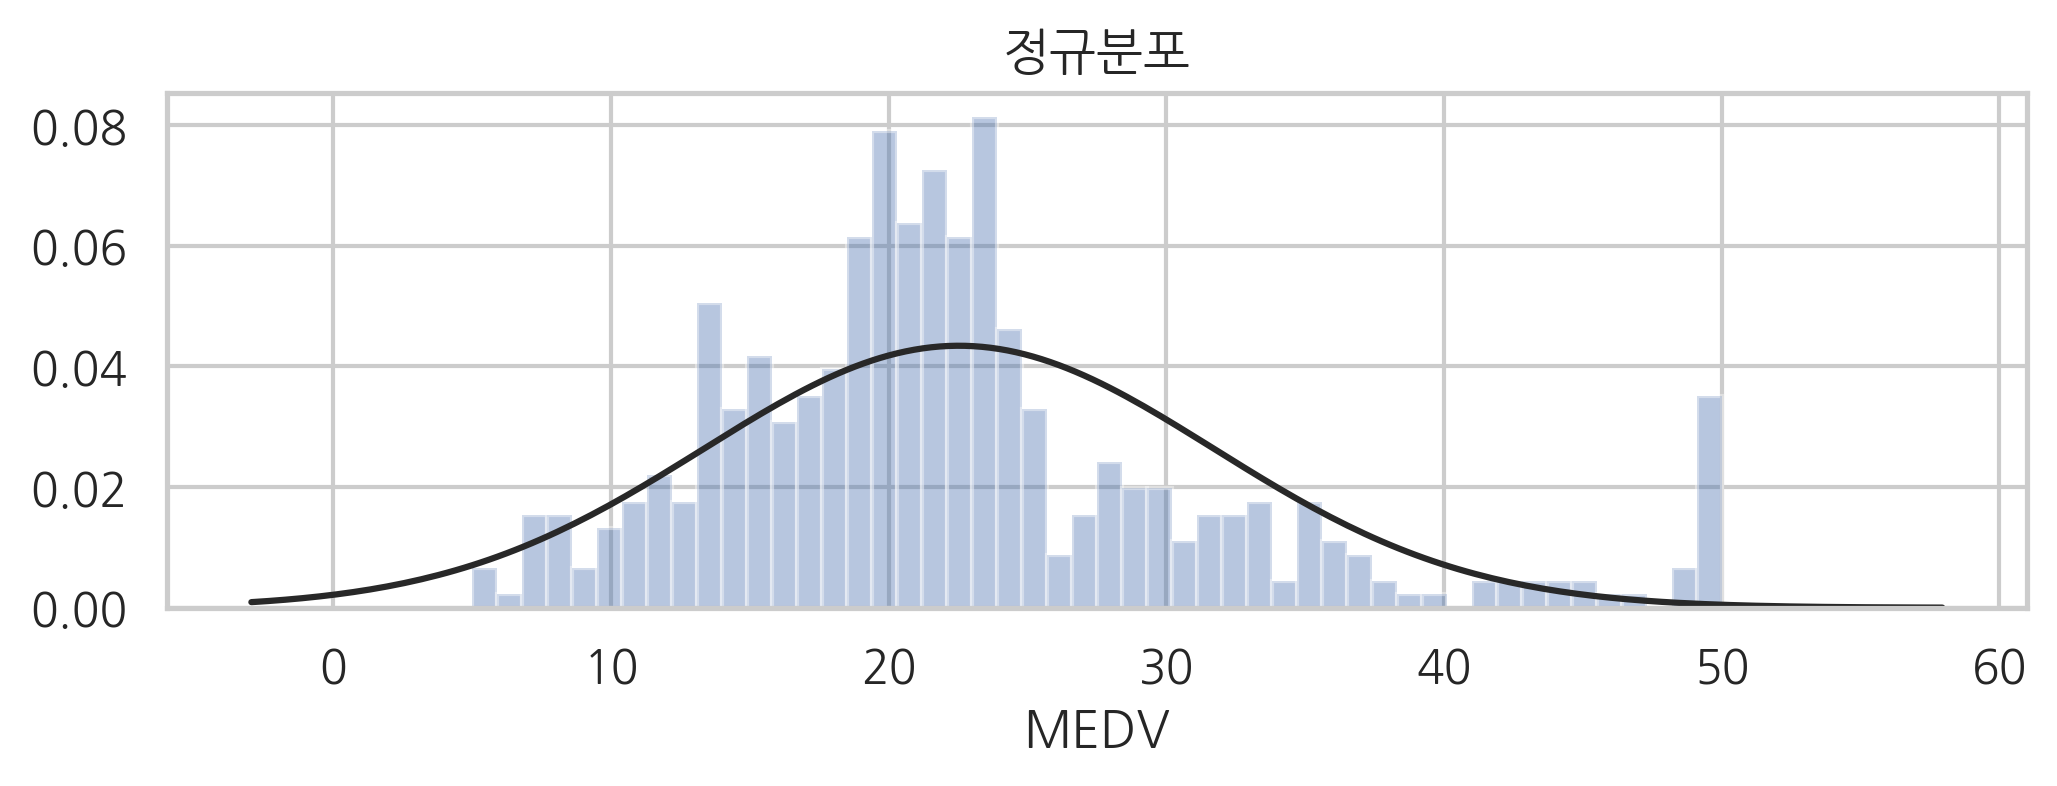

In [361]:
plt.subplot(211)
sns.distplot(df['MEDV'], kde=False, bins=50, fit=sp.stats.norm)
plt.title('정규분포')

Text(0.5, 1.0, '로그정규분포')

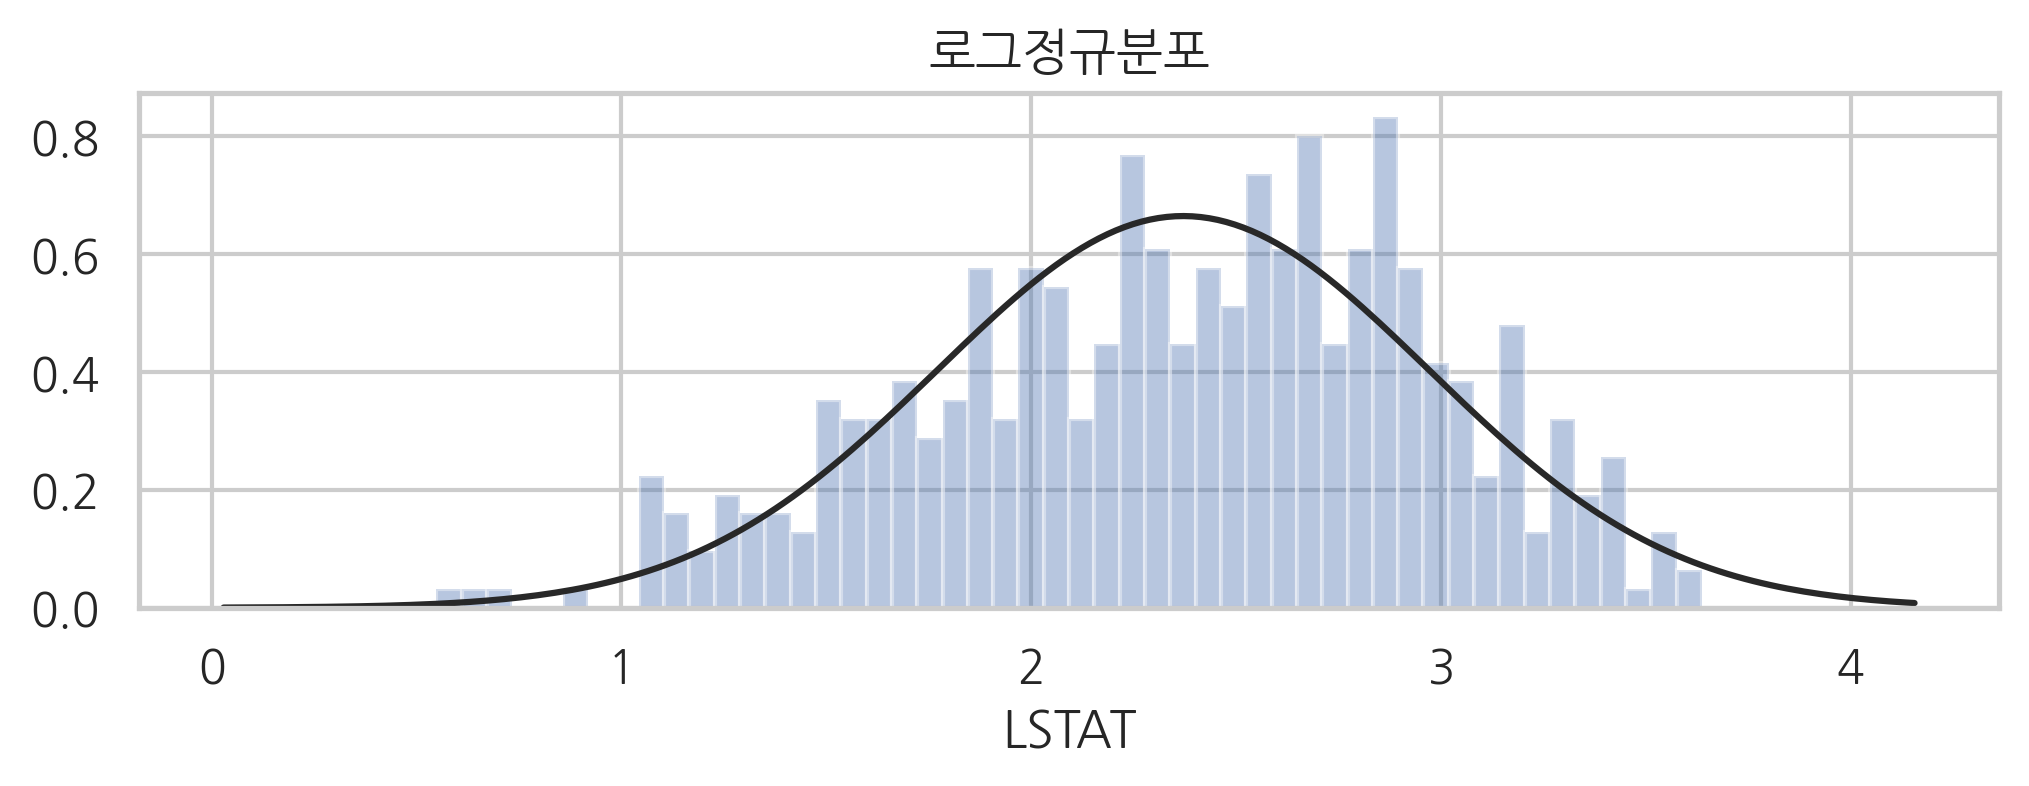

In [363]:
plt.subplot(211)
sns.distplot(np.log(df['LSTAT']), bins=50, kde=False, fit=sp.stats.norm)
plt.title('로그정규분포')

Text(0.5, 0, 'B')

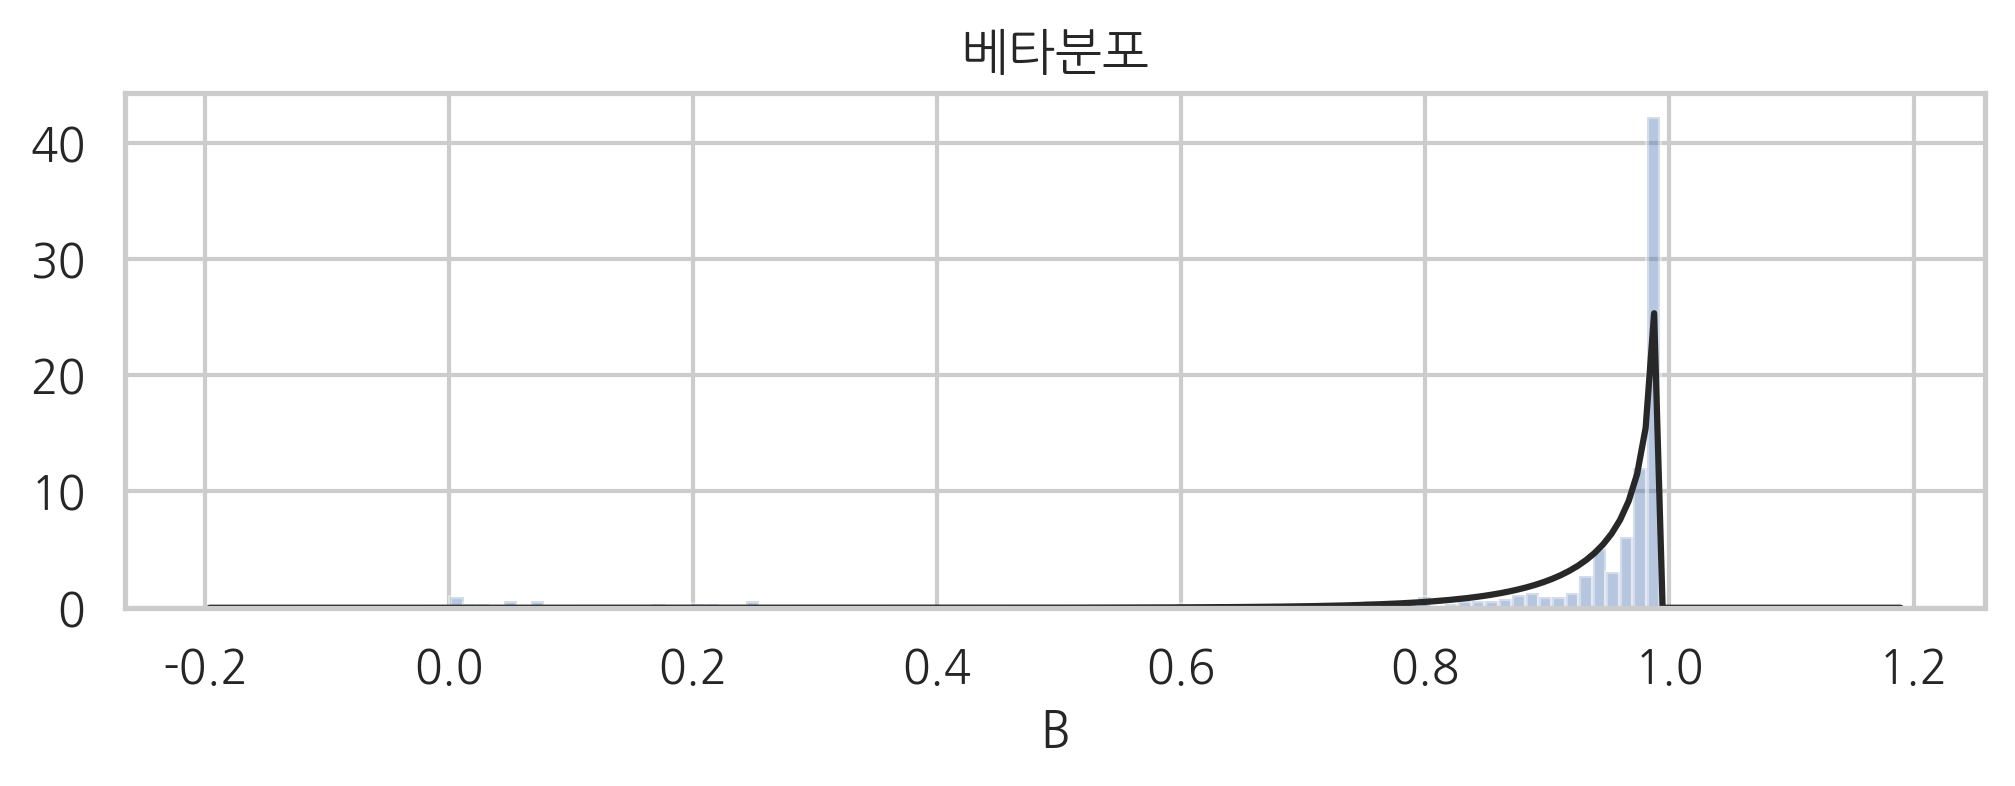

In [371]:
plt.subplot(211)
sns.distplot(df['B']/400, bins=90, kde=False, fit = sp.stats.beta)
plt.title('베타분포')
plt.xlabel('B')

Text(0.5, 0, 'PTRATIO')

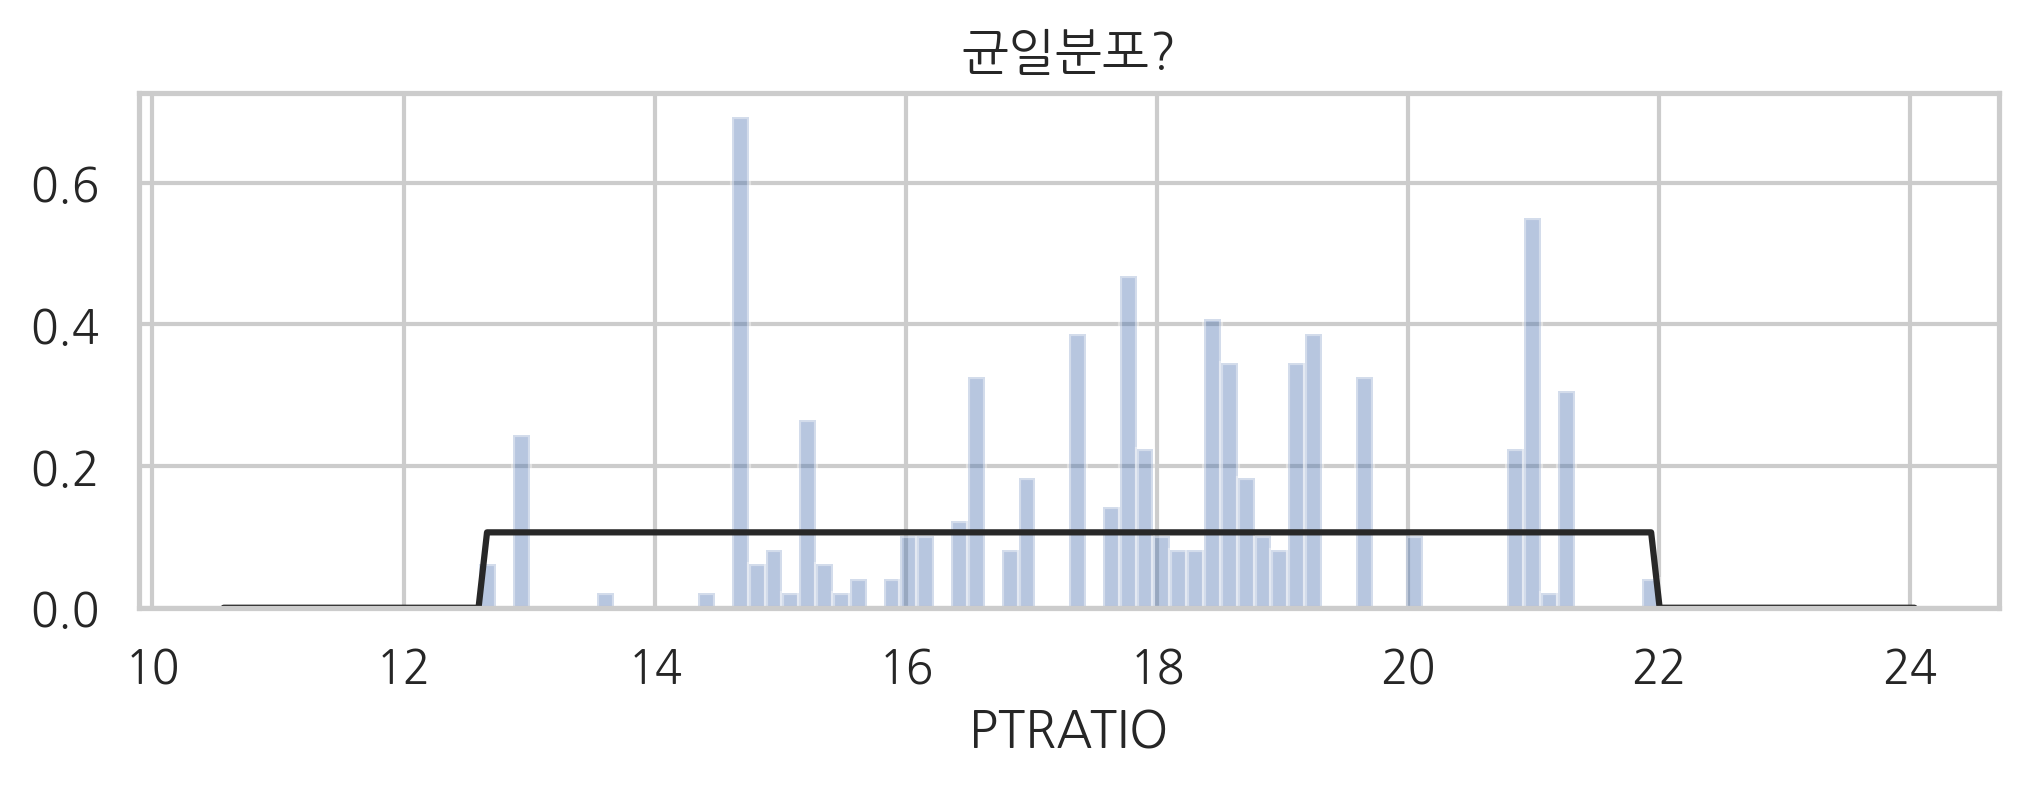

In [376]:
plt.subplot(211)
mode = sp.stats.mode(df['PTRATIO'])[0][0]
sns.distplot(df[df['PTRATIO']!=mode]['PTRATIO'], bins=70, kde=False, fit=sp.stats.uniform)
plt.title('균일분포?')
plt.xlabel('PTRATIO')

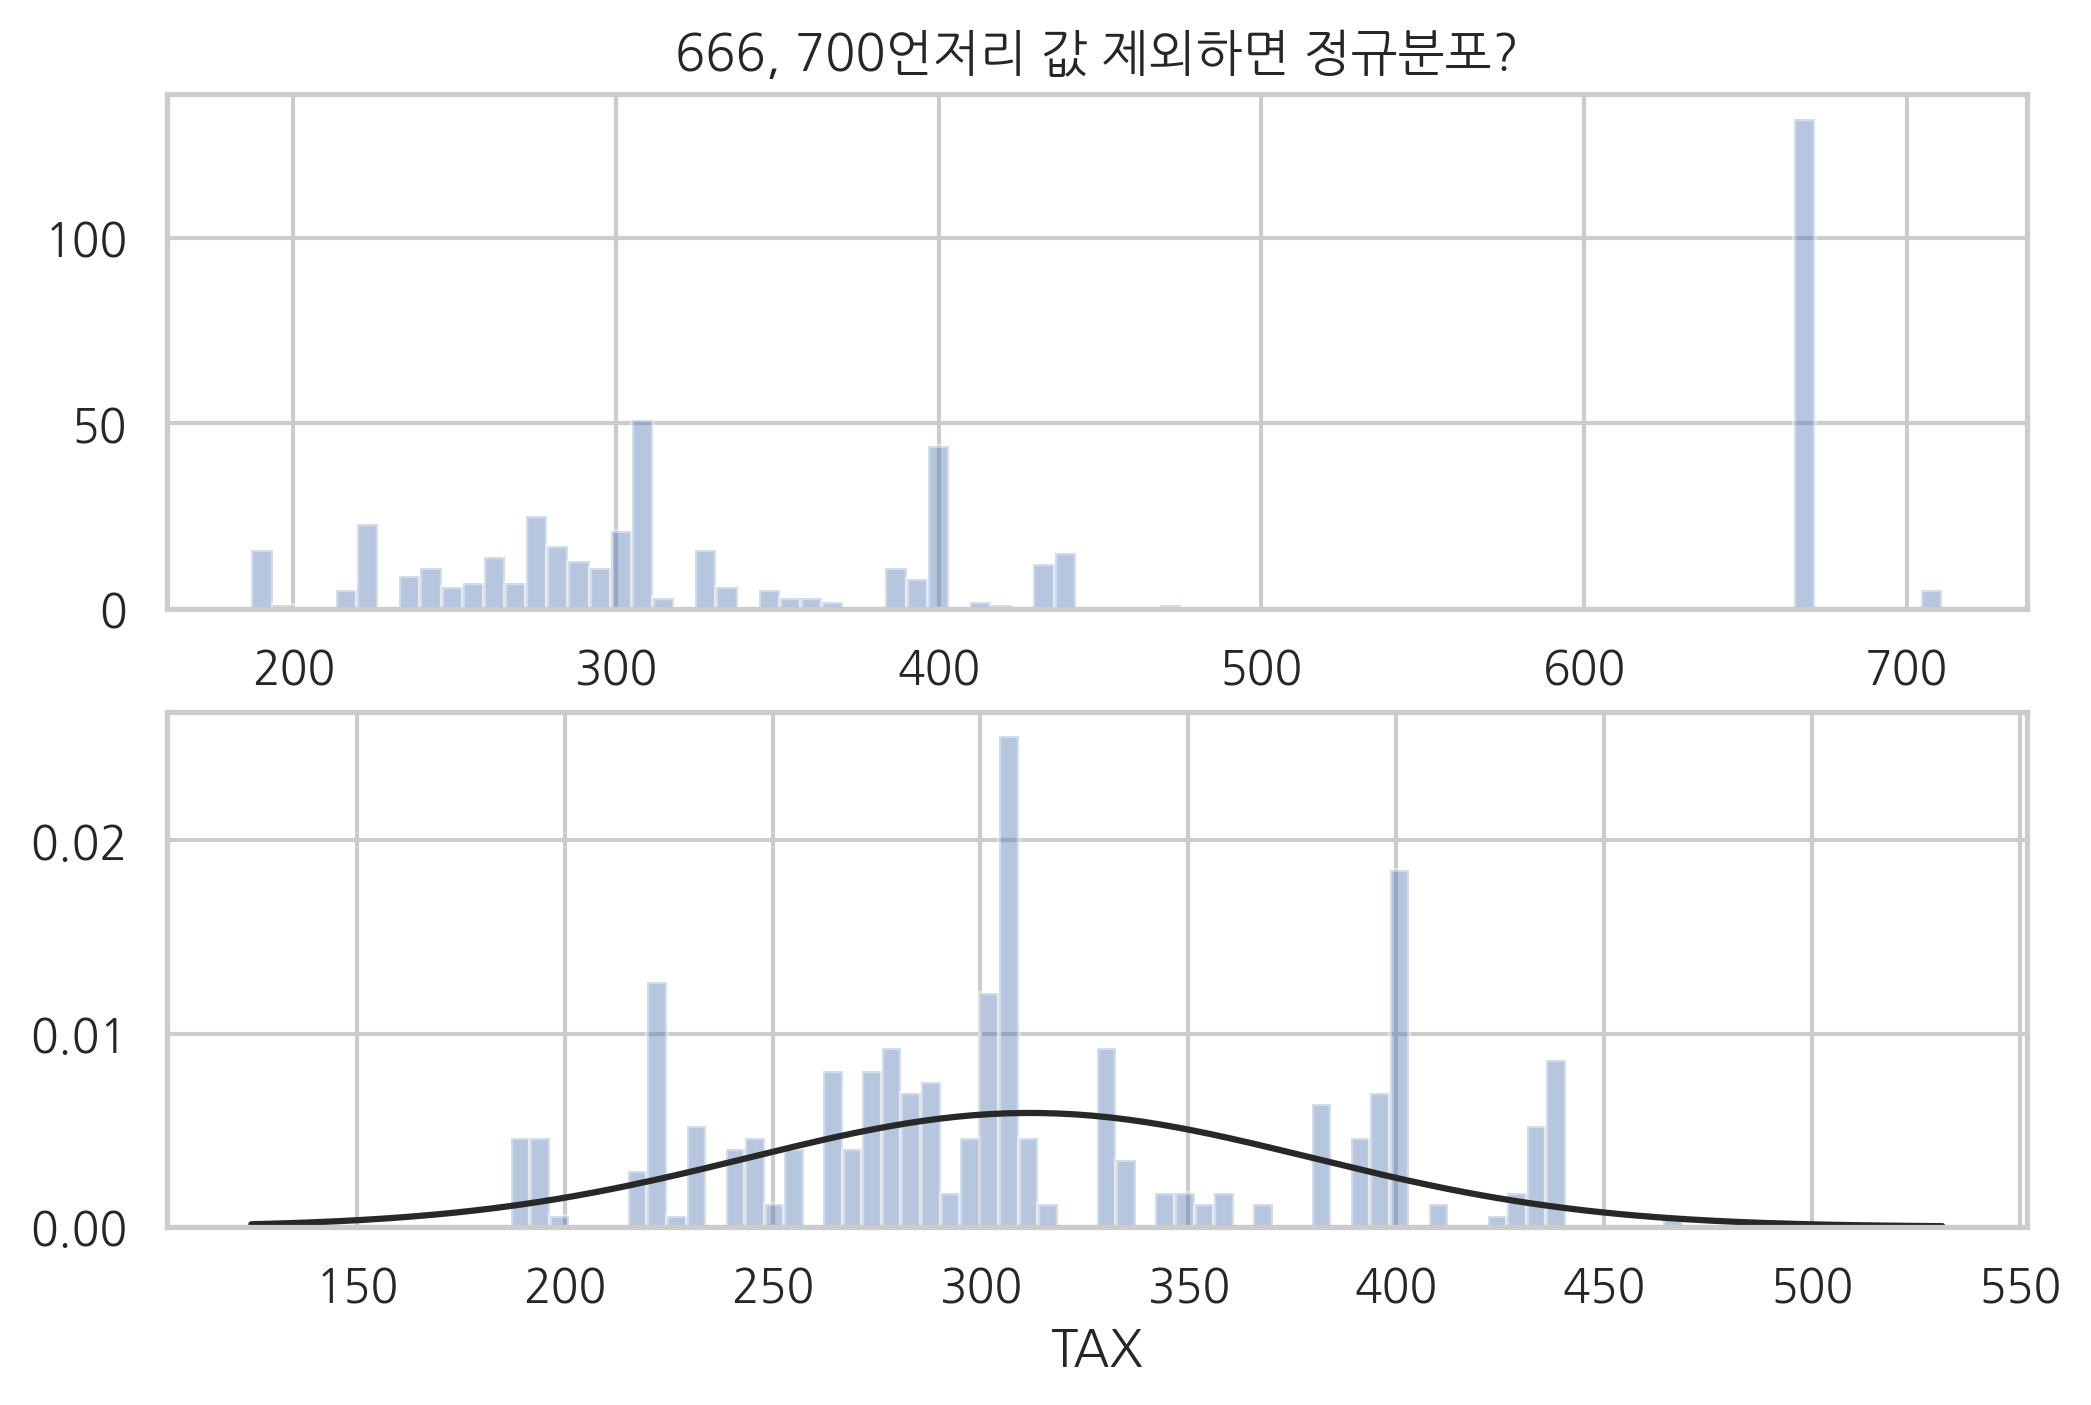

In [379]:
plt.subplot(211)
sns.distplot(df['TAX'], kde=False, bins=80, )
plt.title('666, 700언저리 값 제외하면 정규분포?')
mode = sp.stats.mode(df['TAX'])[0][0]
max_ = np.max(df['TAX'])

plt.subplot(212)
sns.distplot(df[(df['TAX']!=mode)&(df['TAX']!=max_)]['TAX'], kde=False, bins=60, fit=sp.stats.norm)
plt.show()

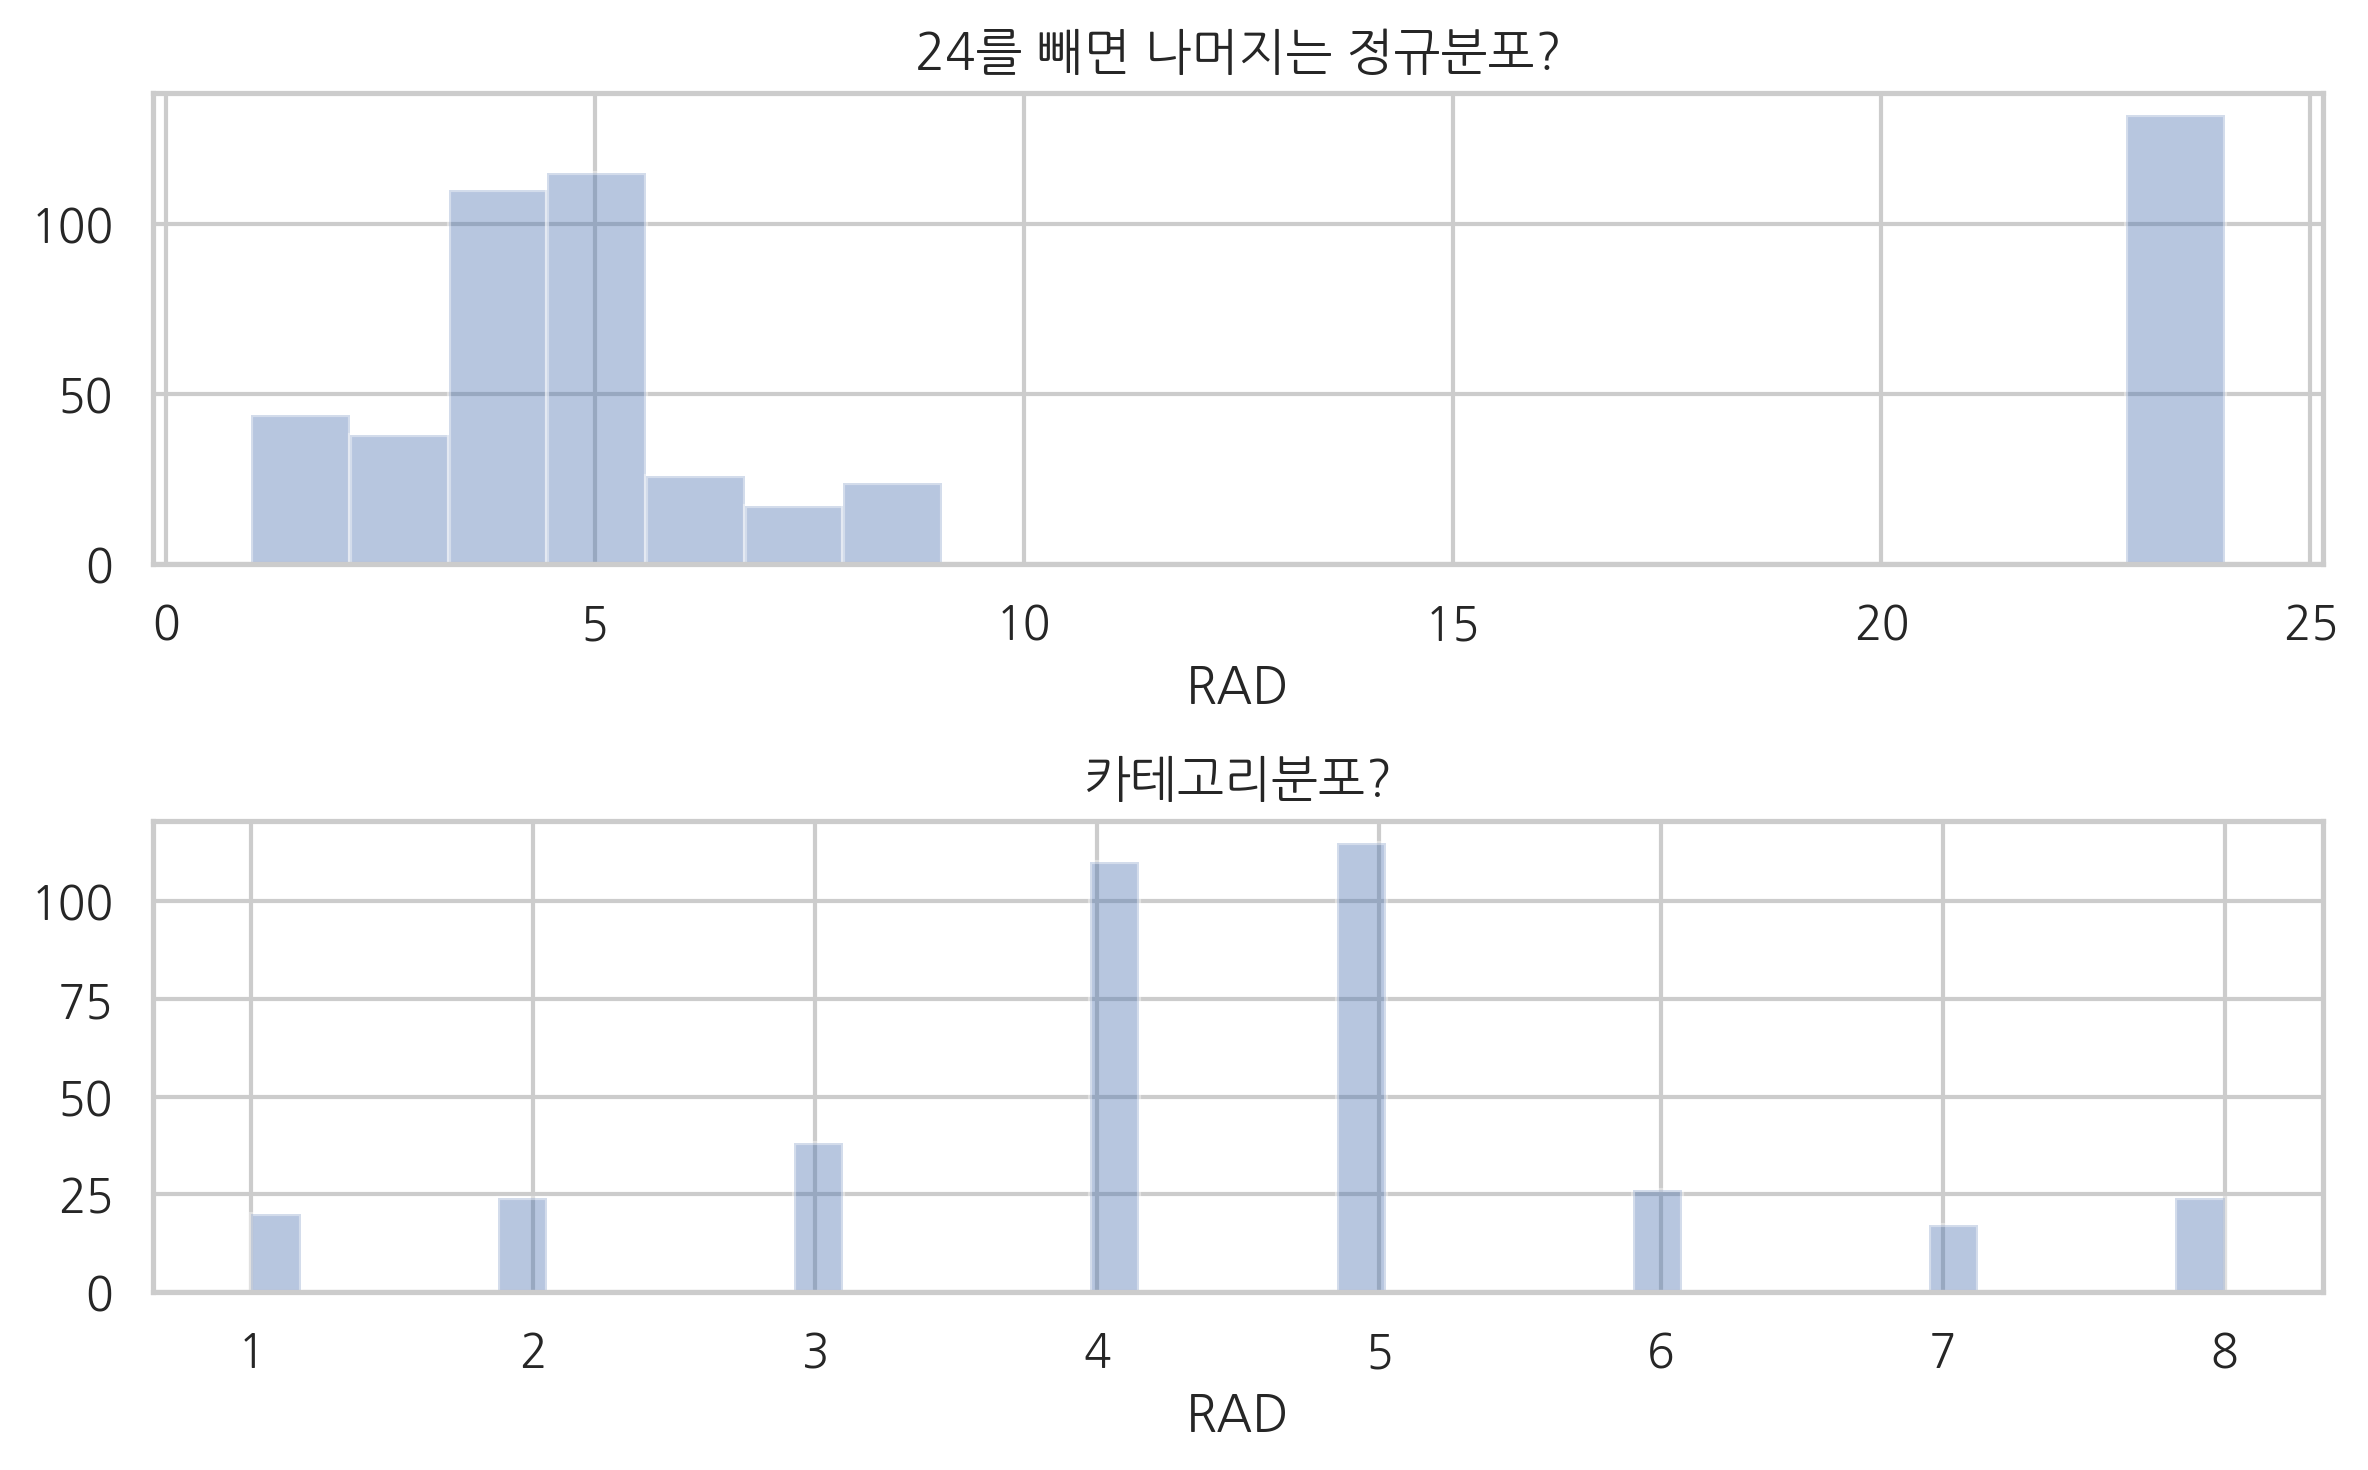

In [383]:
plt.subplot(211)
df['RAD'].value_counts()
sns.distplot(df['RAD'], kde=False, bins=20)
plt.title('24를 빼면 나머지는 정규분포?')

plt.subplot(212)
sns.distplot(df[df['RAD'] != 24]['RAD'], kde=False, bins=40, )
plt.title('카테고리분포?')
plt.tight_layout()
plt.show()

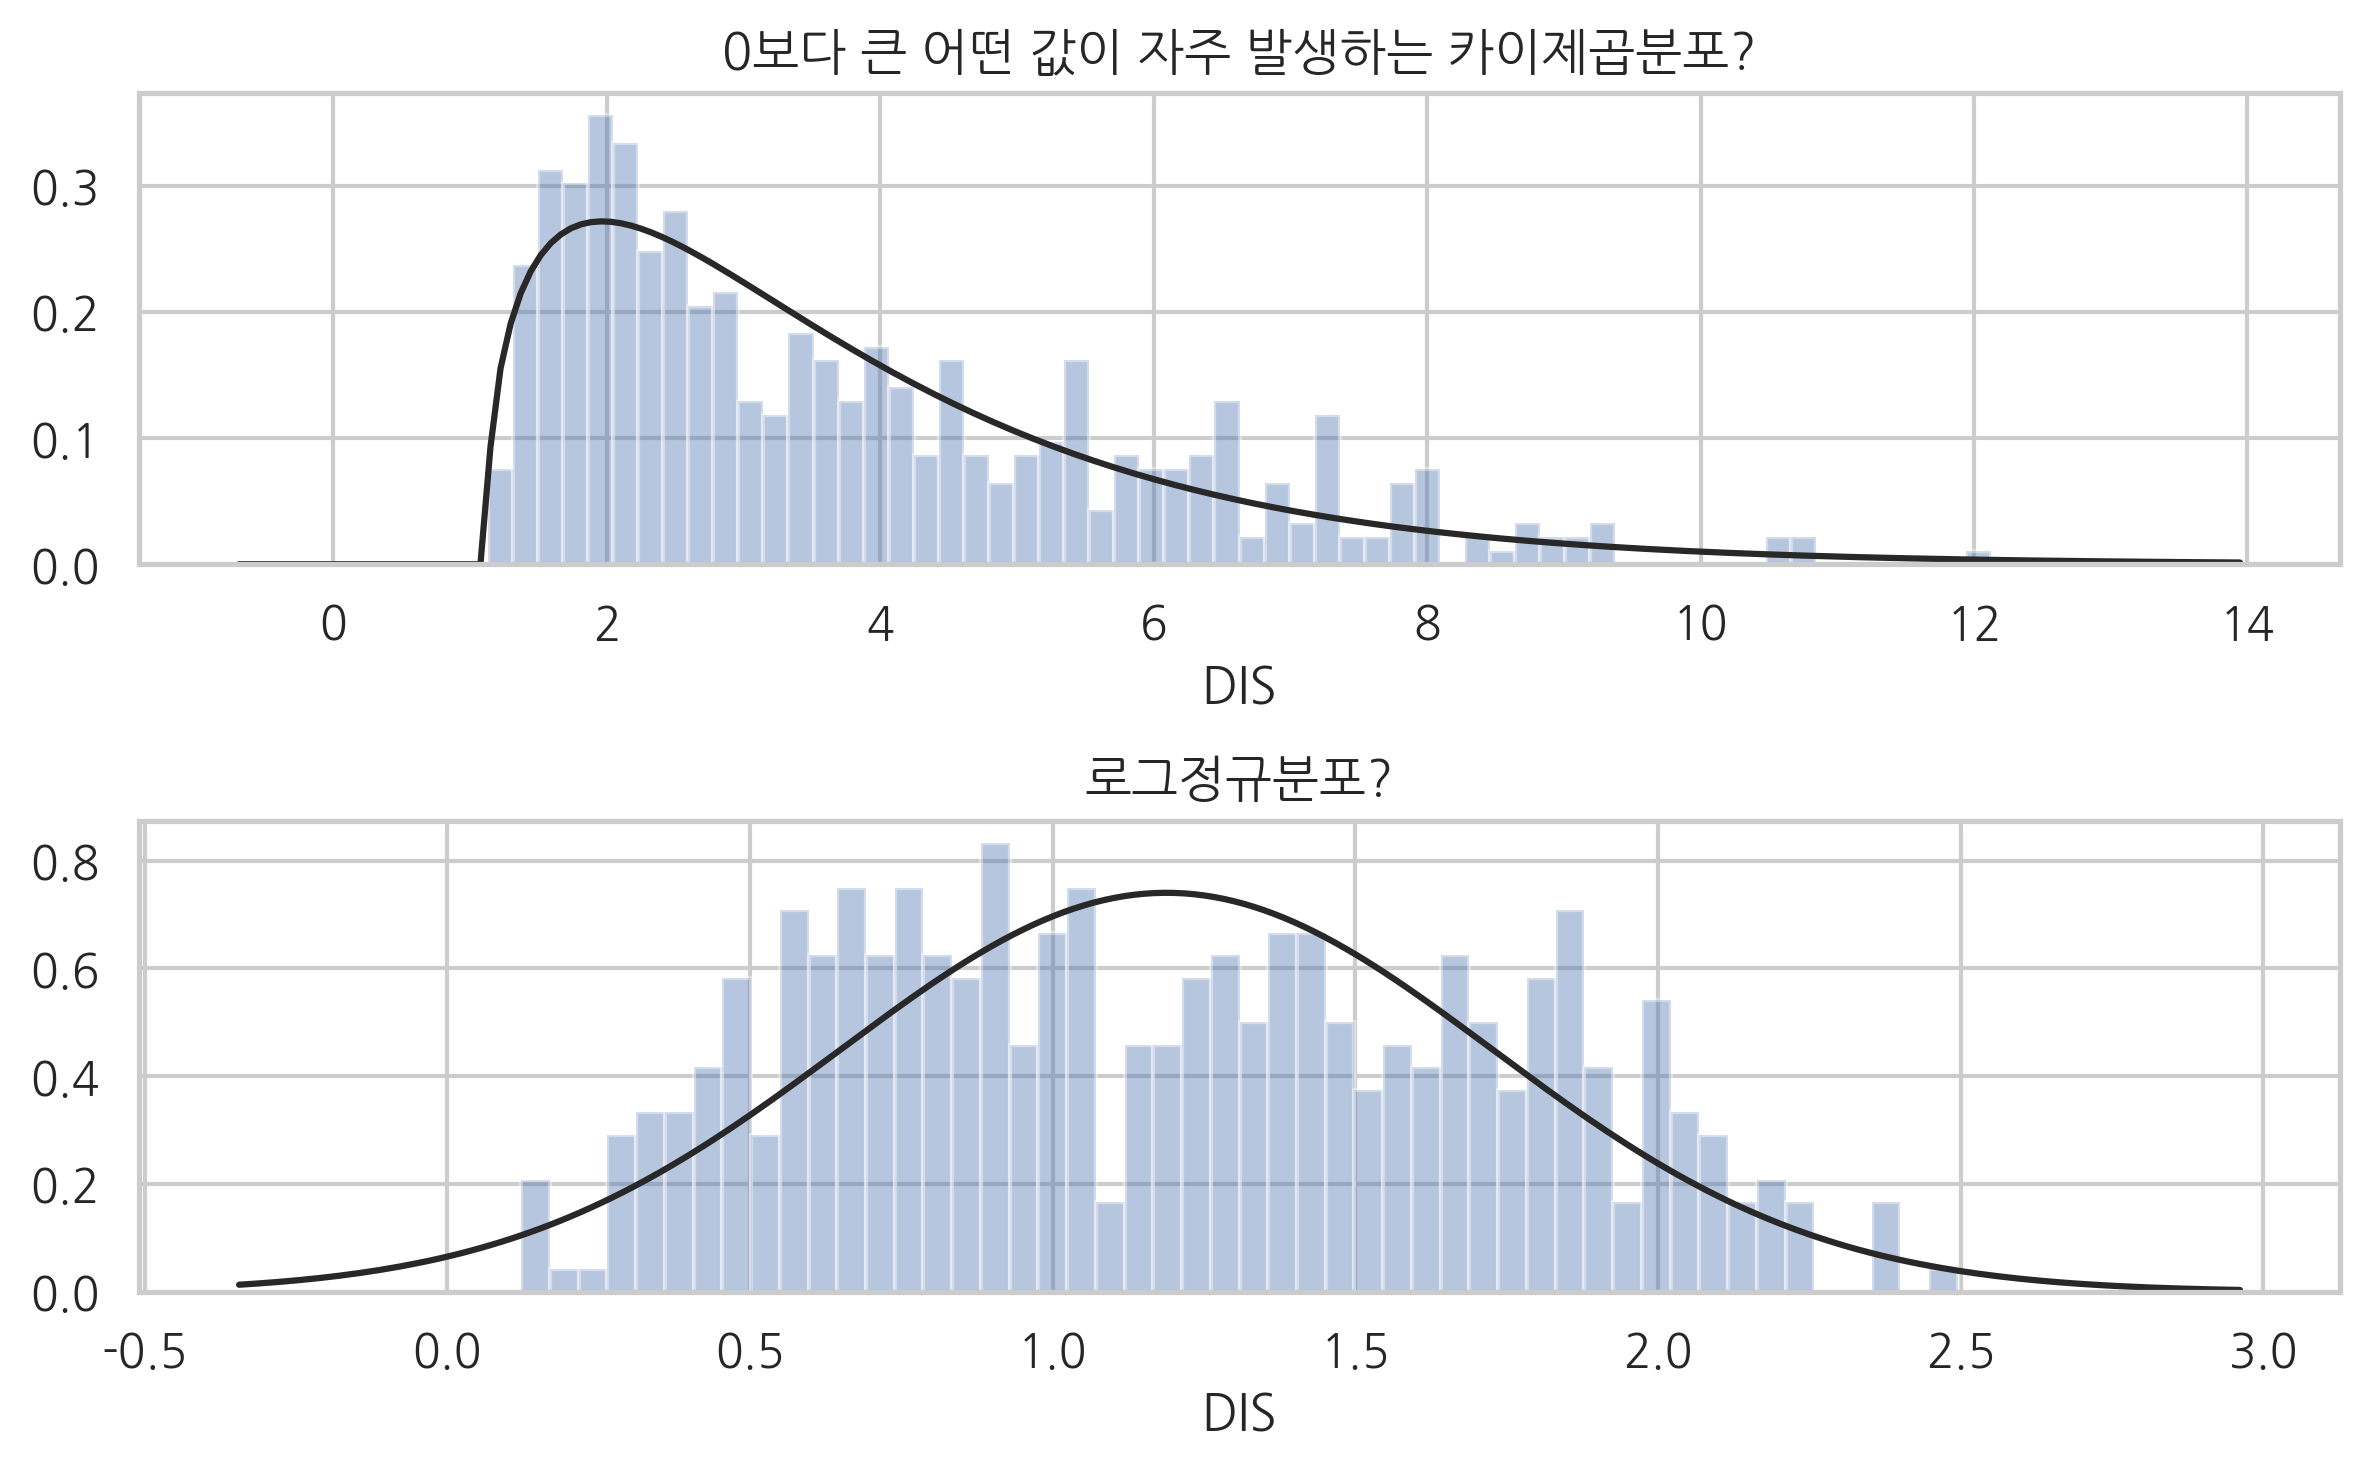

In [385]:
plt.subplot(211)
sns.distplot(df['DIS'], kde=False, bins=60, fit=sp.stats.chi2)
plt.title('0보다 큰 어떤 값이 자주 발생하는 카이제곱분포?')

plt.subplot(212)
sns.distplot(np.log(df['DIS']), kde=False, bins=50, fit=sp.stats.norm)
plt.title('로그정규분포?')

plt.tight_layout()

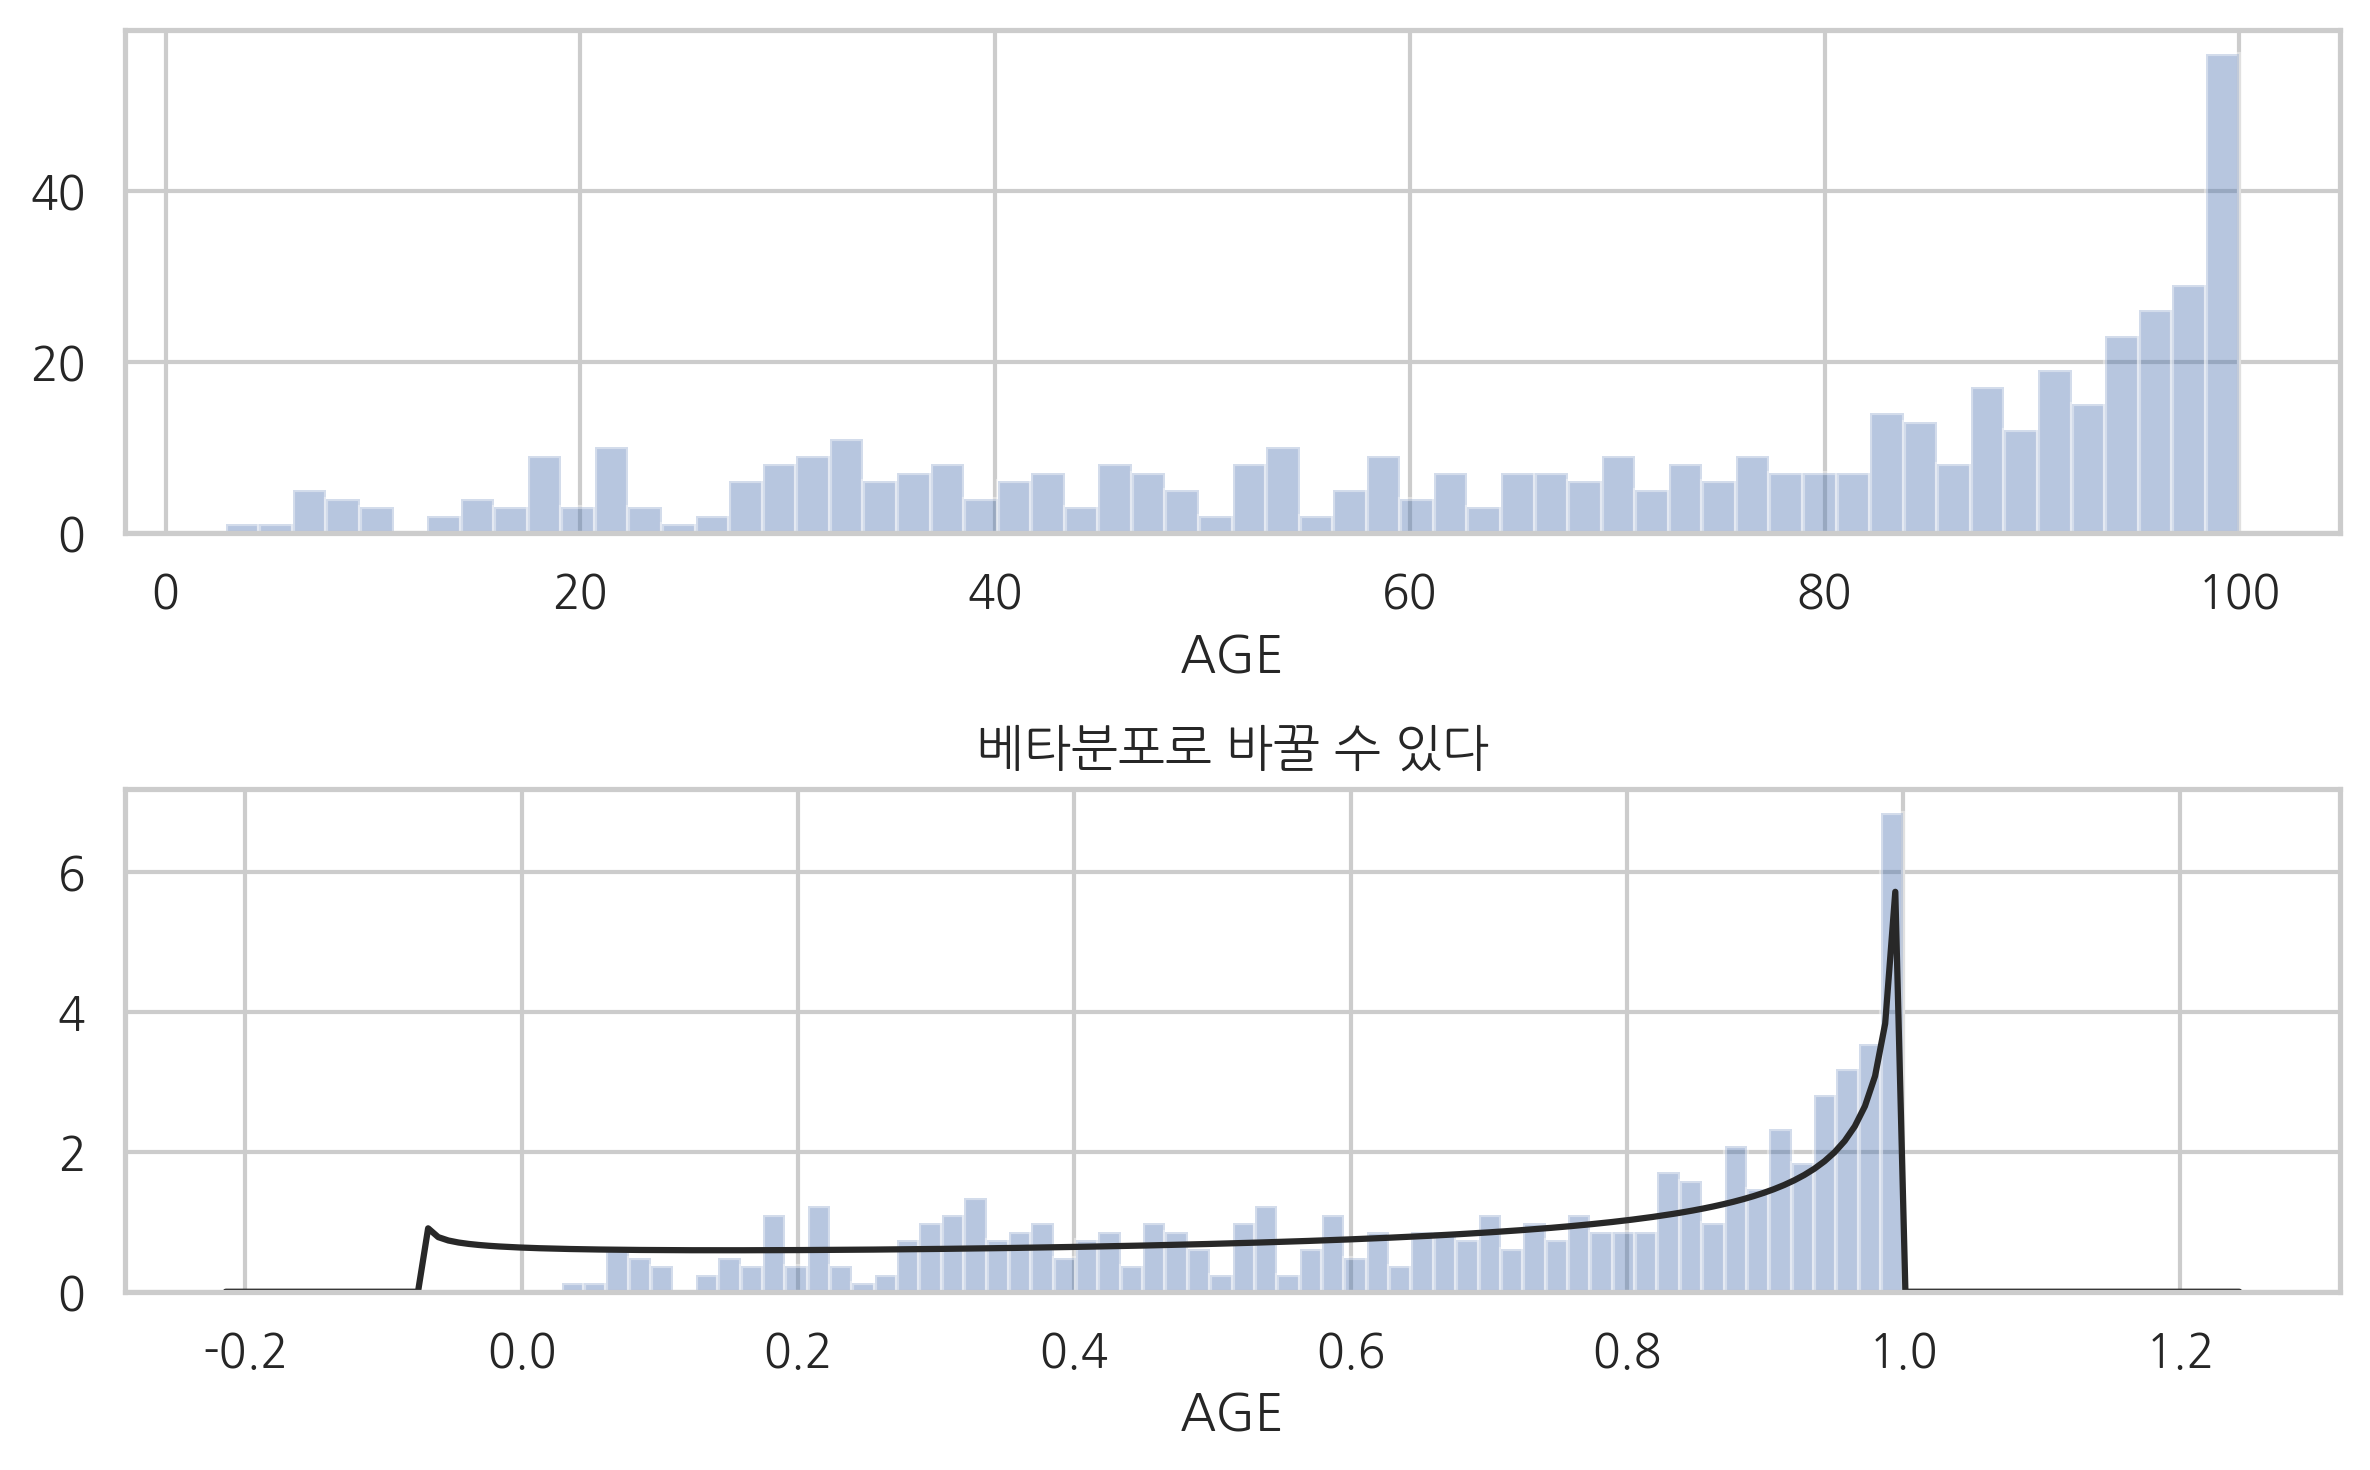

In [387]:
plt.subplot(211)
sns.distplot(df['AGE'], kde=False, bins=60)
plt.subplot(212)
sns.distplot(df['AGE']/100, kde=False, bins=60, fit=sp.stats.beta)
plt.title('베타분포로 바꿀 수 있다')
plt.tight_layout()

Text(0.5, 1.0, '정규분포일 것이다')

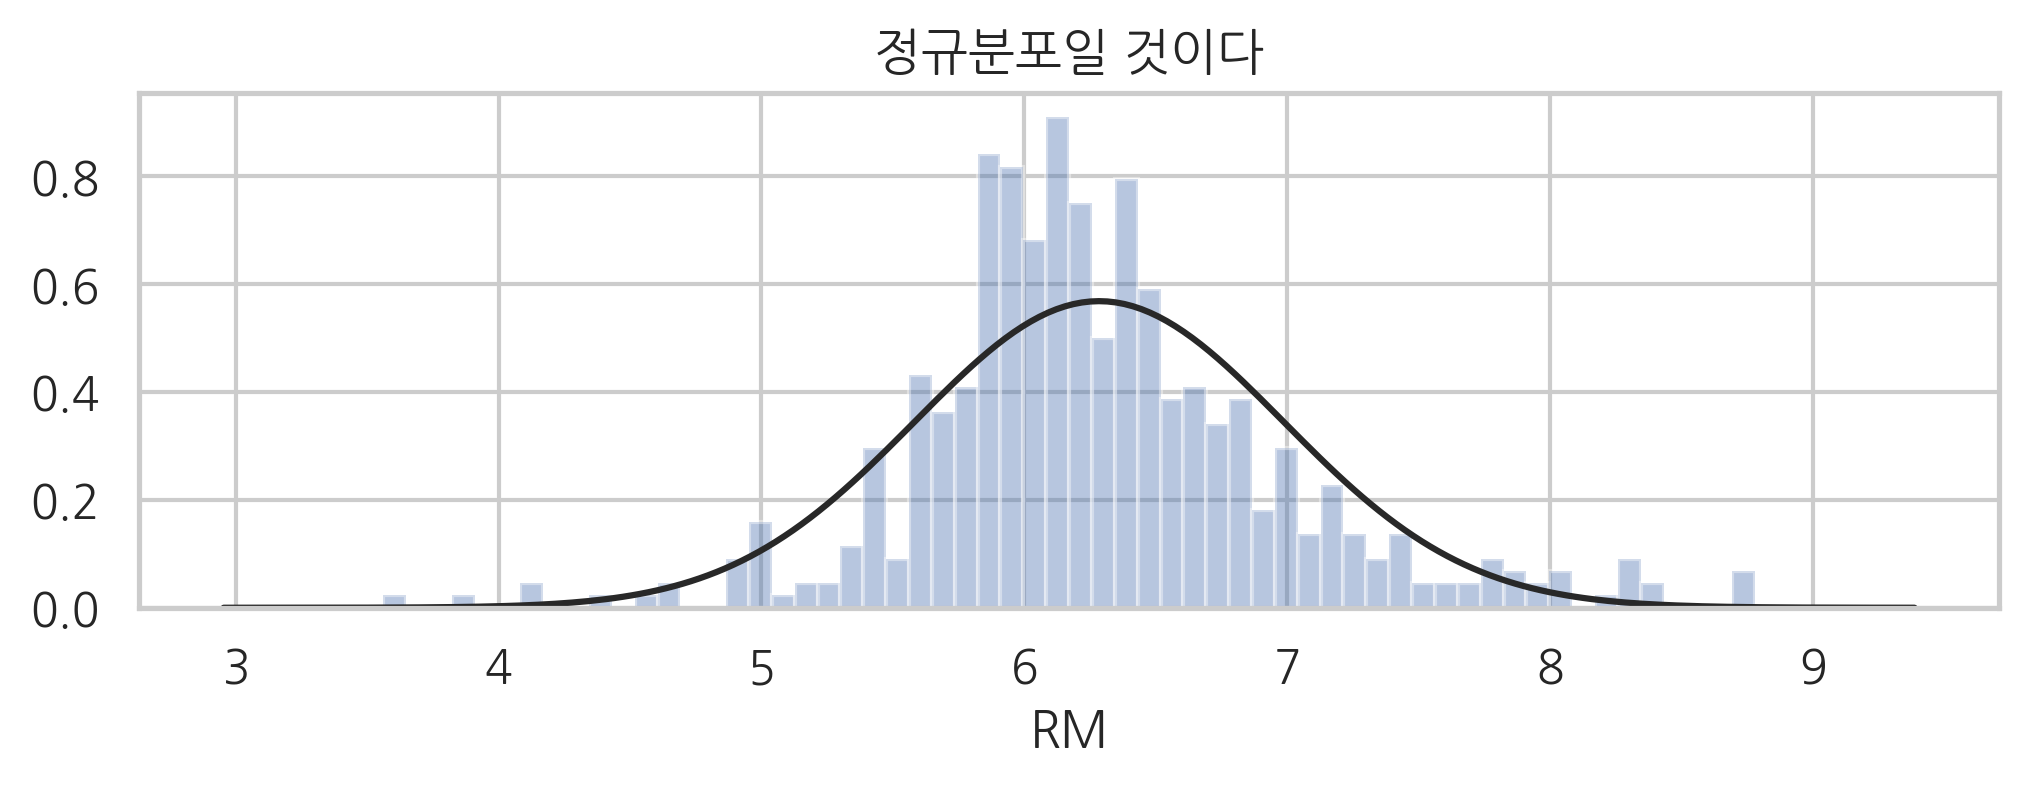

In [388]:
plt.subplot(211)
sns.distplot(df['RM'], kde=False, bins=60, fit=sp.stats.norm)
plt.title('정규분포일 것이다')

Text(0.5, 0, 'NOX')

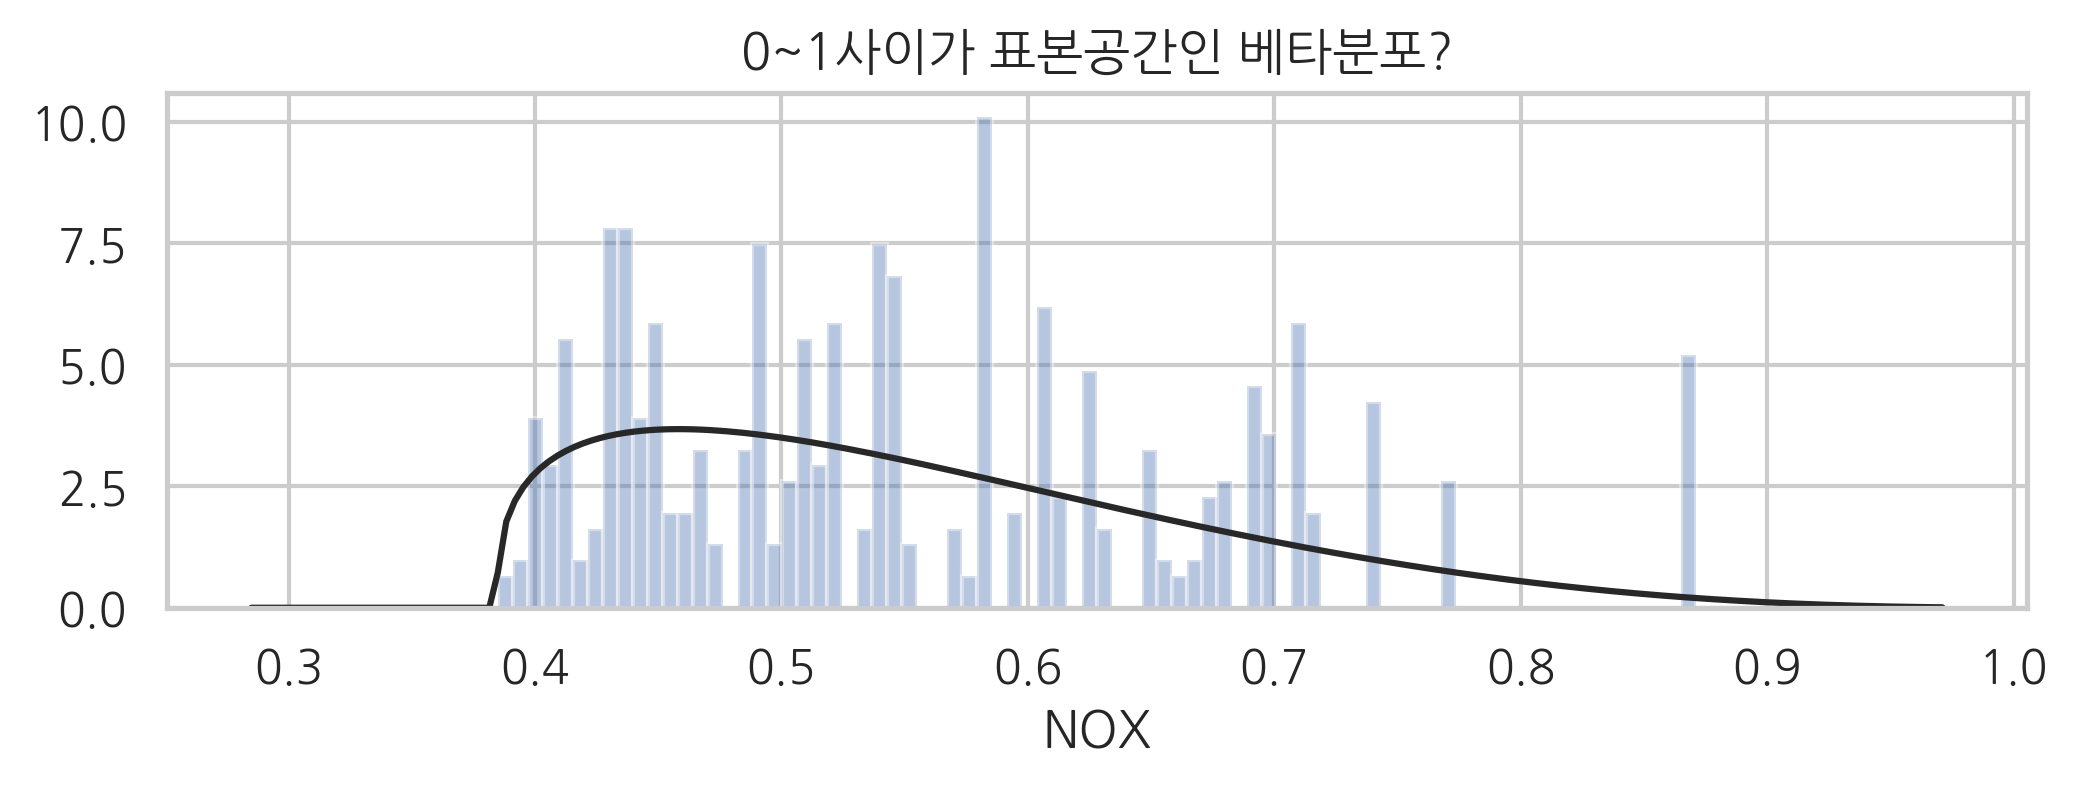

In [389]:
plt.subplot(211)
sns.distplot(df['NOX'].values, kde=False, bins=80, fit=sp.stats.beta)
plt.title('0~1사이가 표본공간인 베타분포?')
plt.xlabel('NOX')

Text(0.5, 1.0, '베르누이확률분포')

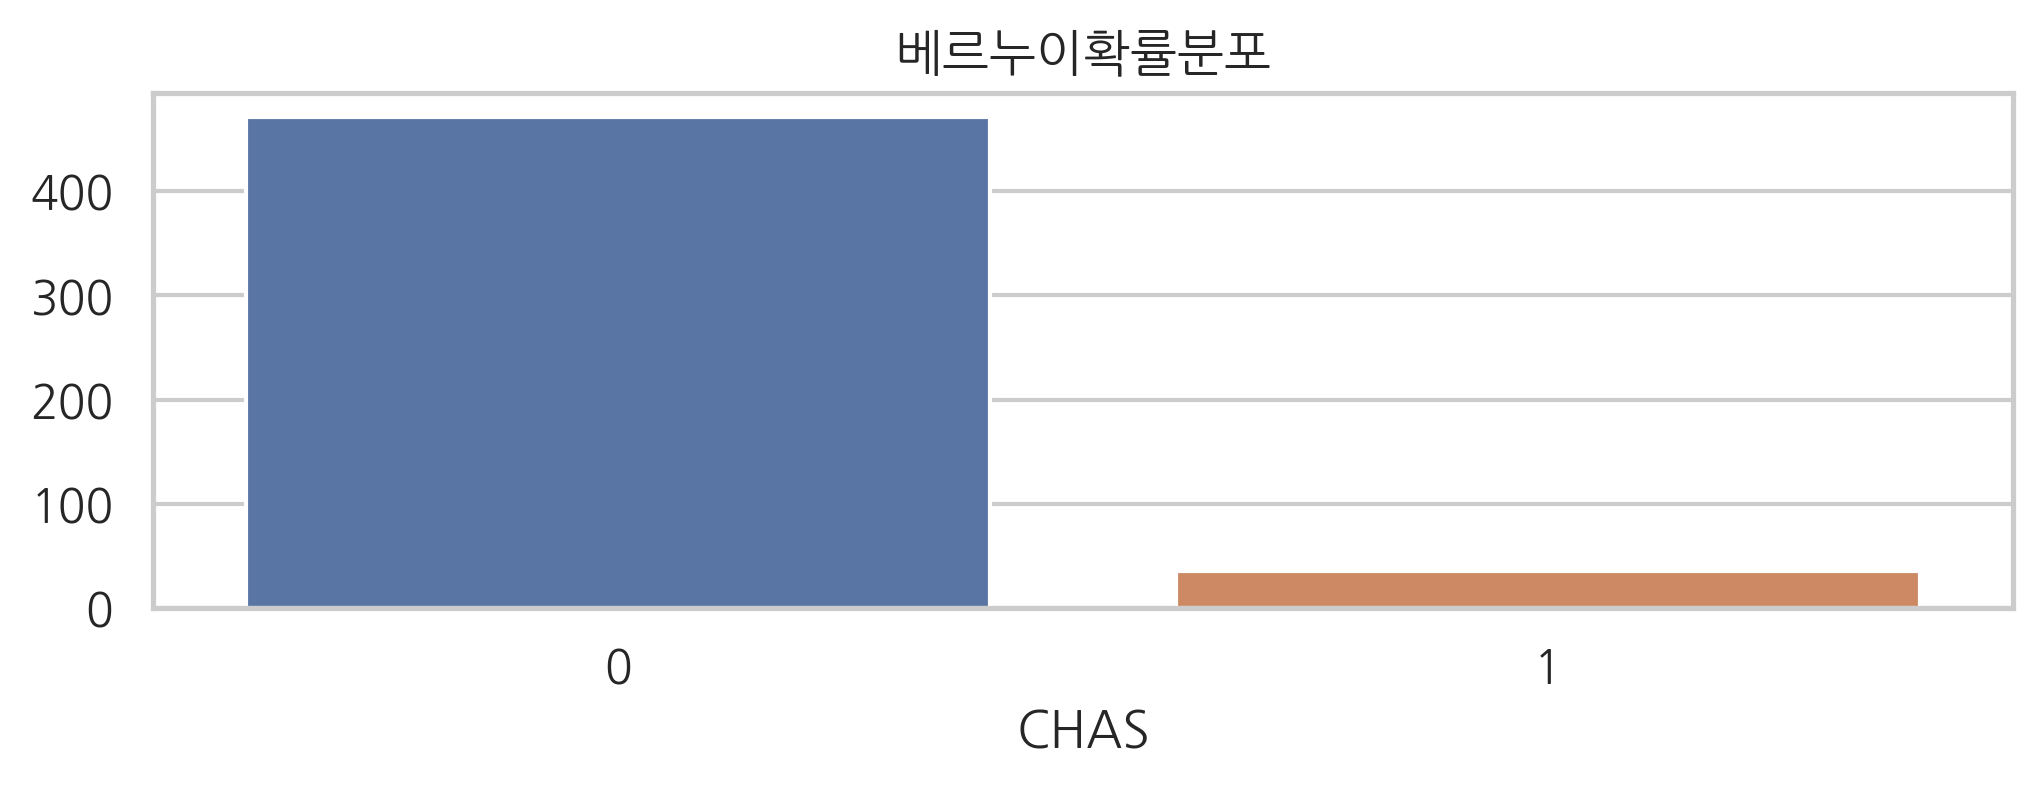

In [80]:
plt.subplot(211)
sns.barplot([0,1],df['CHAS'].value_counts().values)
plt.xlabel('CHAS')
plt.title('베르누이확률분포')

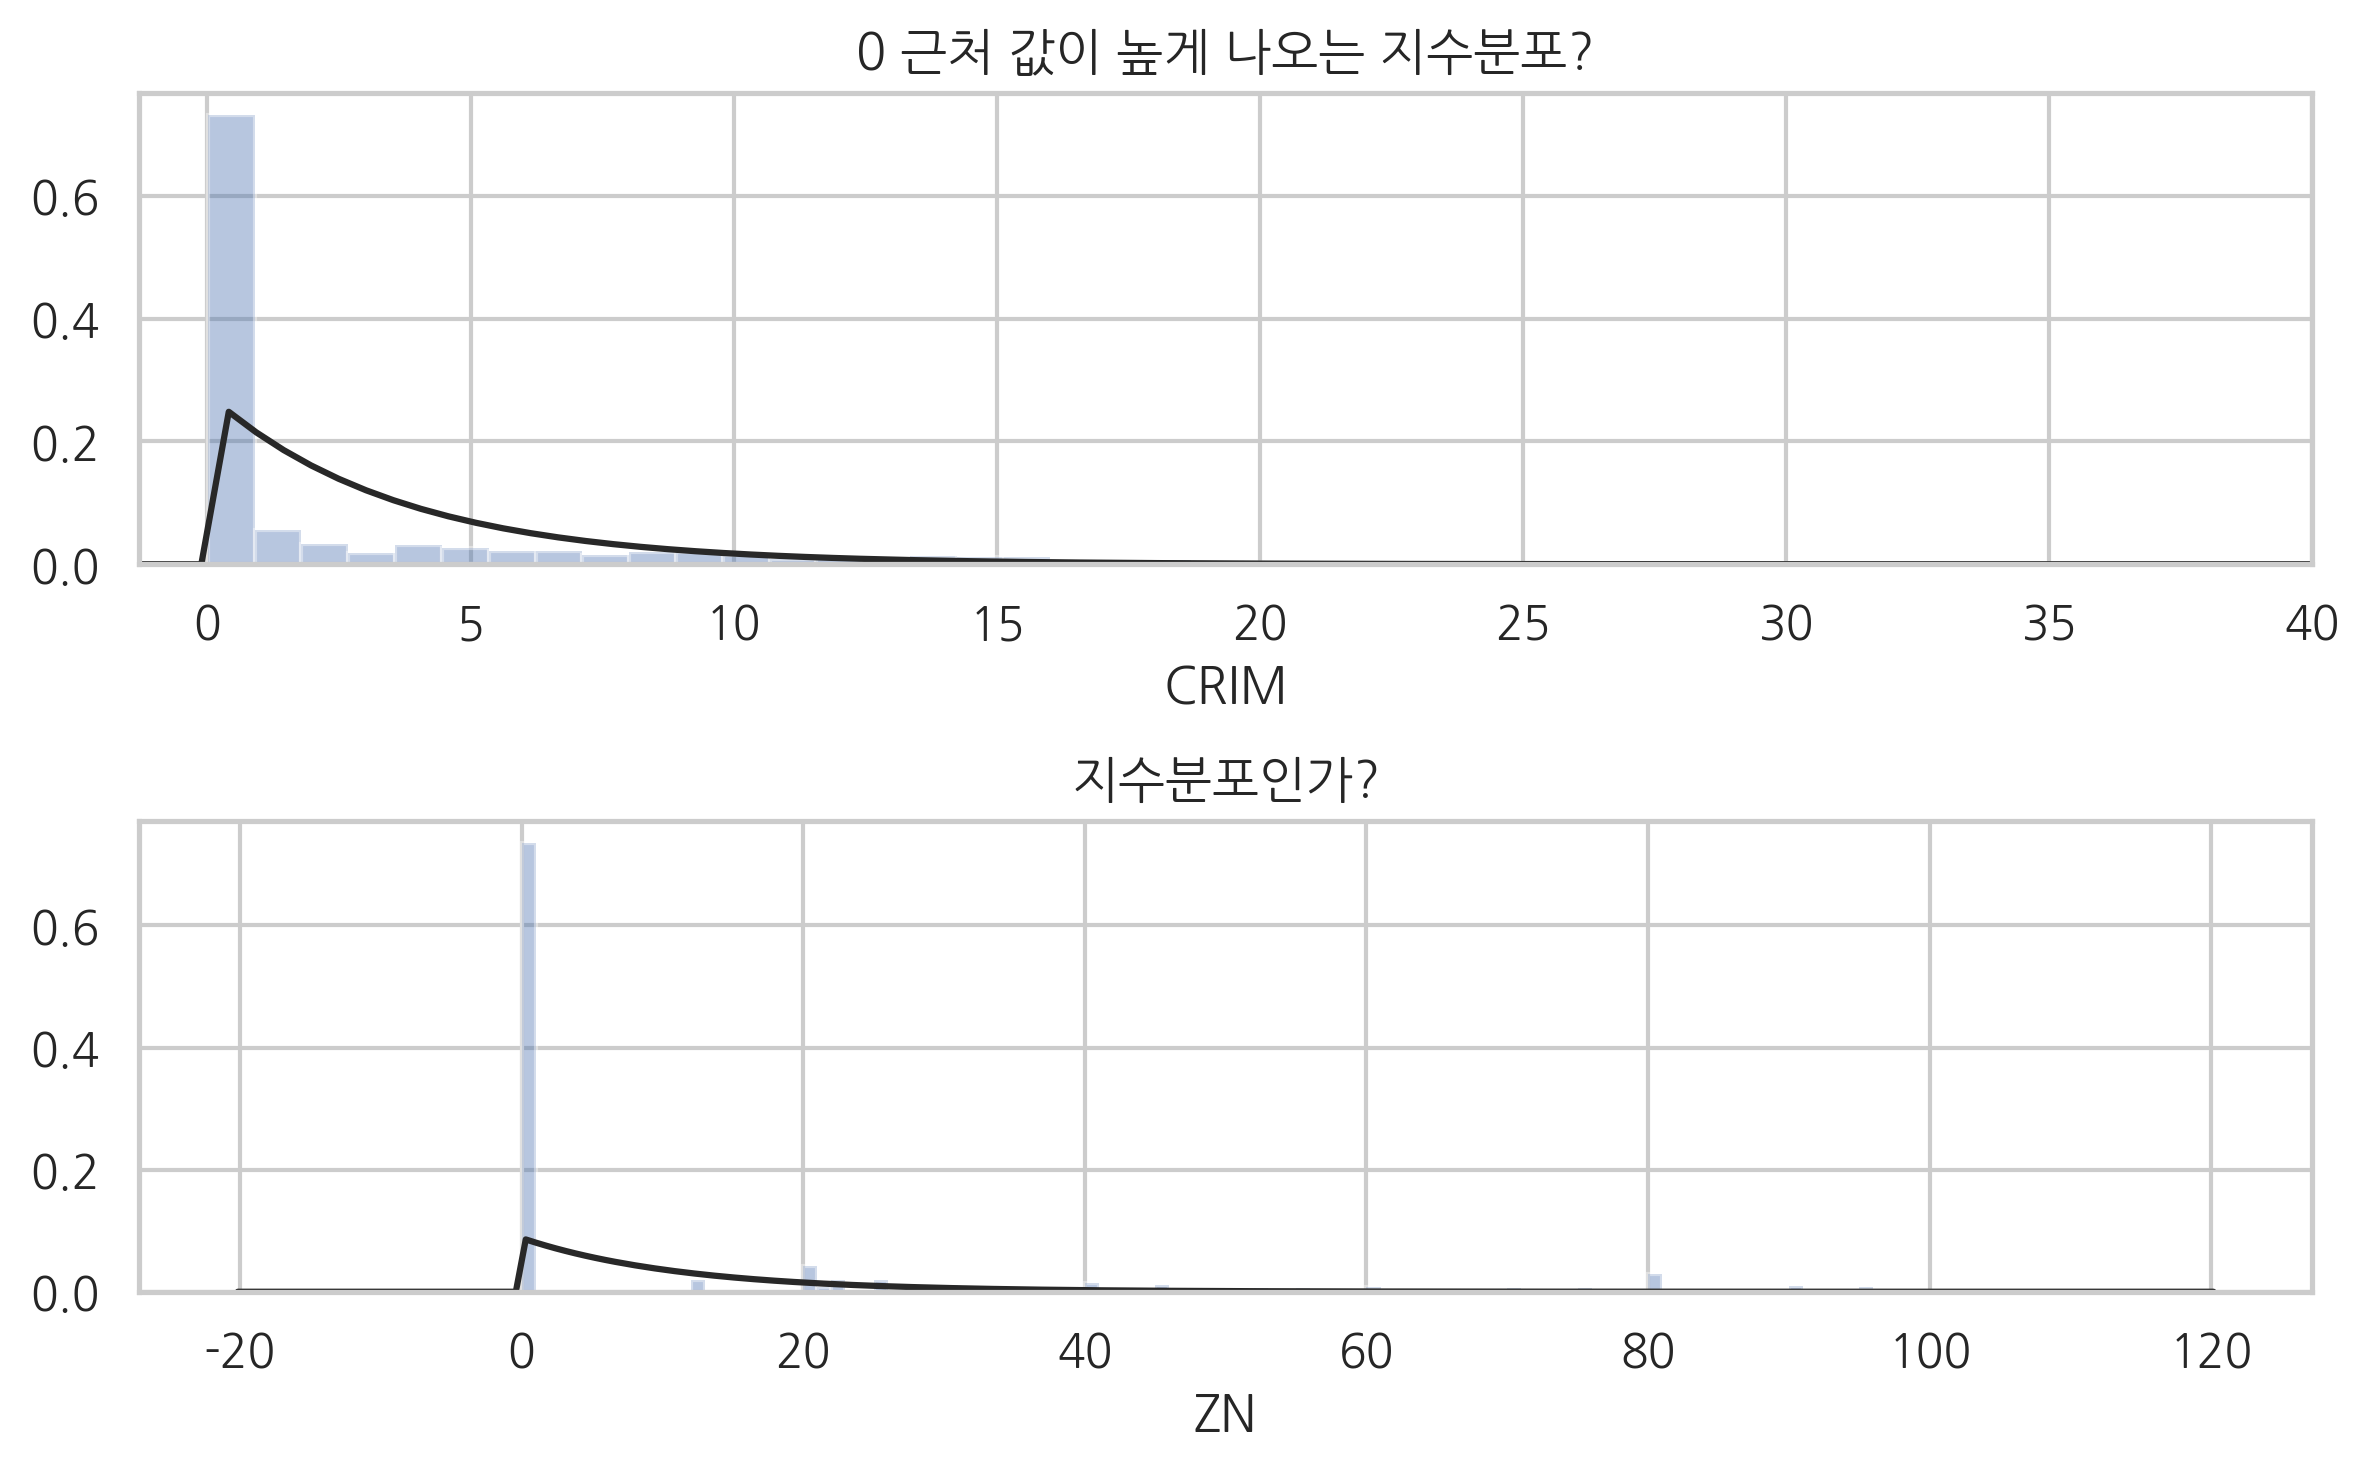

In [391]:
plt.subplot(211)
sns.distplot(df['CRIM'], kde=False,bins=100, fit=sp.stats.expon)
plt.xlim(-1.3, 40)
plt.title('0 근처 값이 높게 나오는 지수분포?')

plt.subplot(212)
sns.distplot(df['ZN'], kde=False, bins=100, fit=sp.stats.expon)
plt.title('지수분포인가?')
plt.tight_layout()
plt.show()

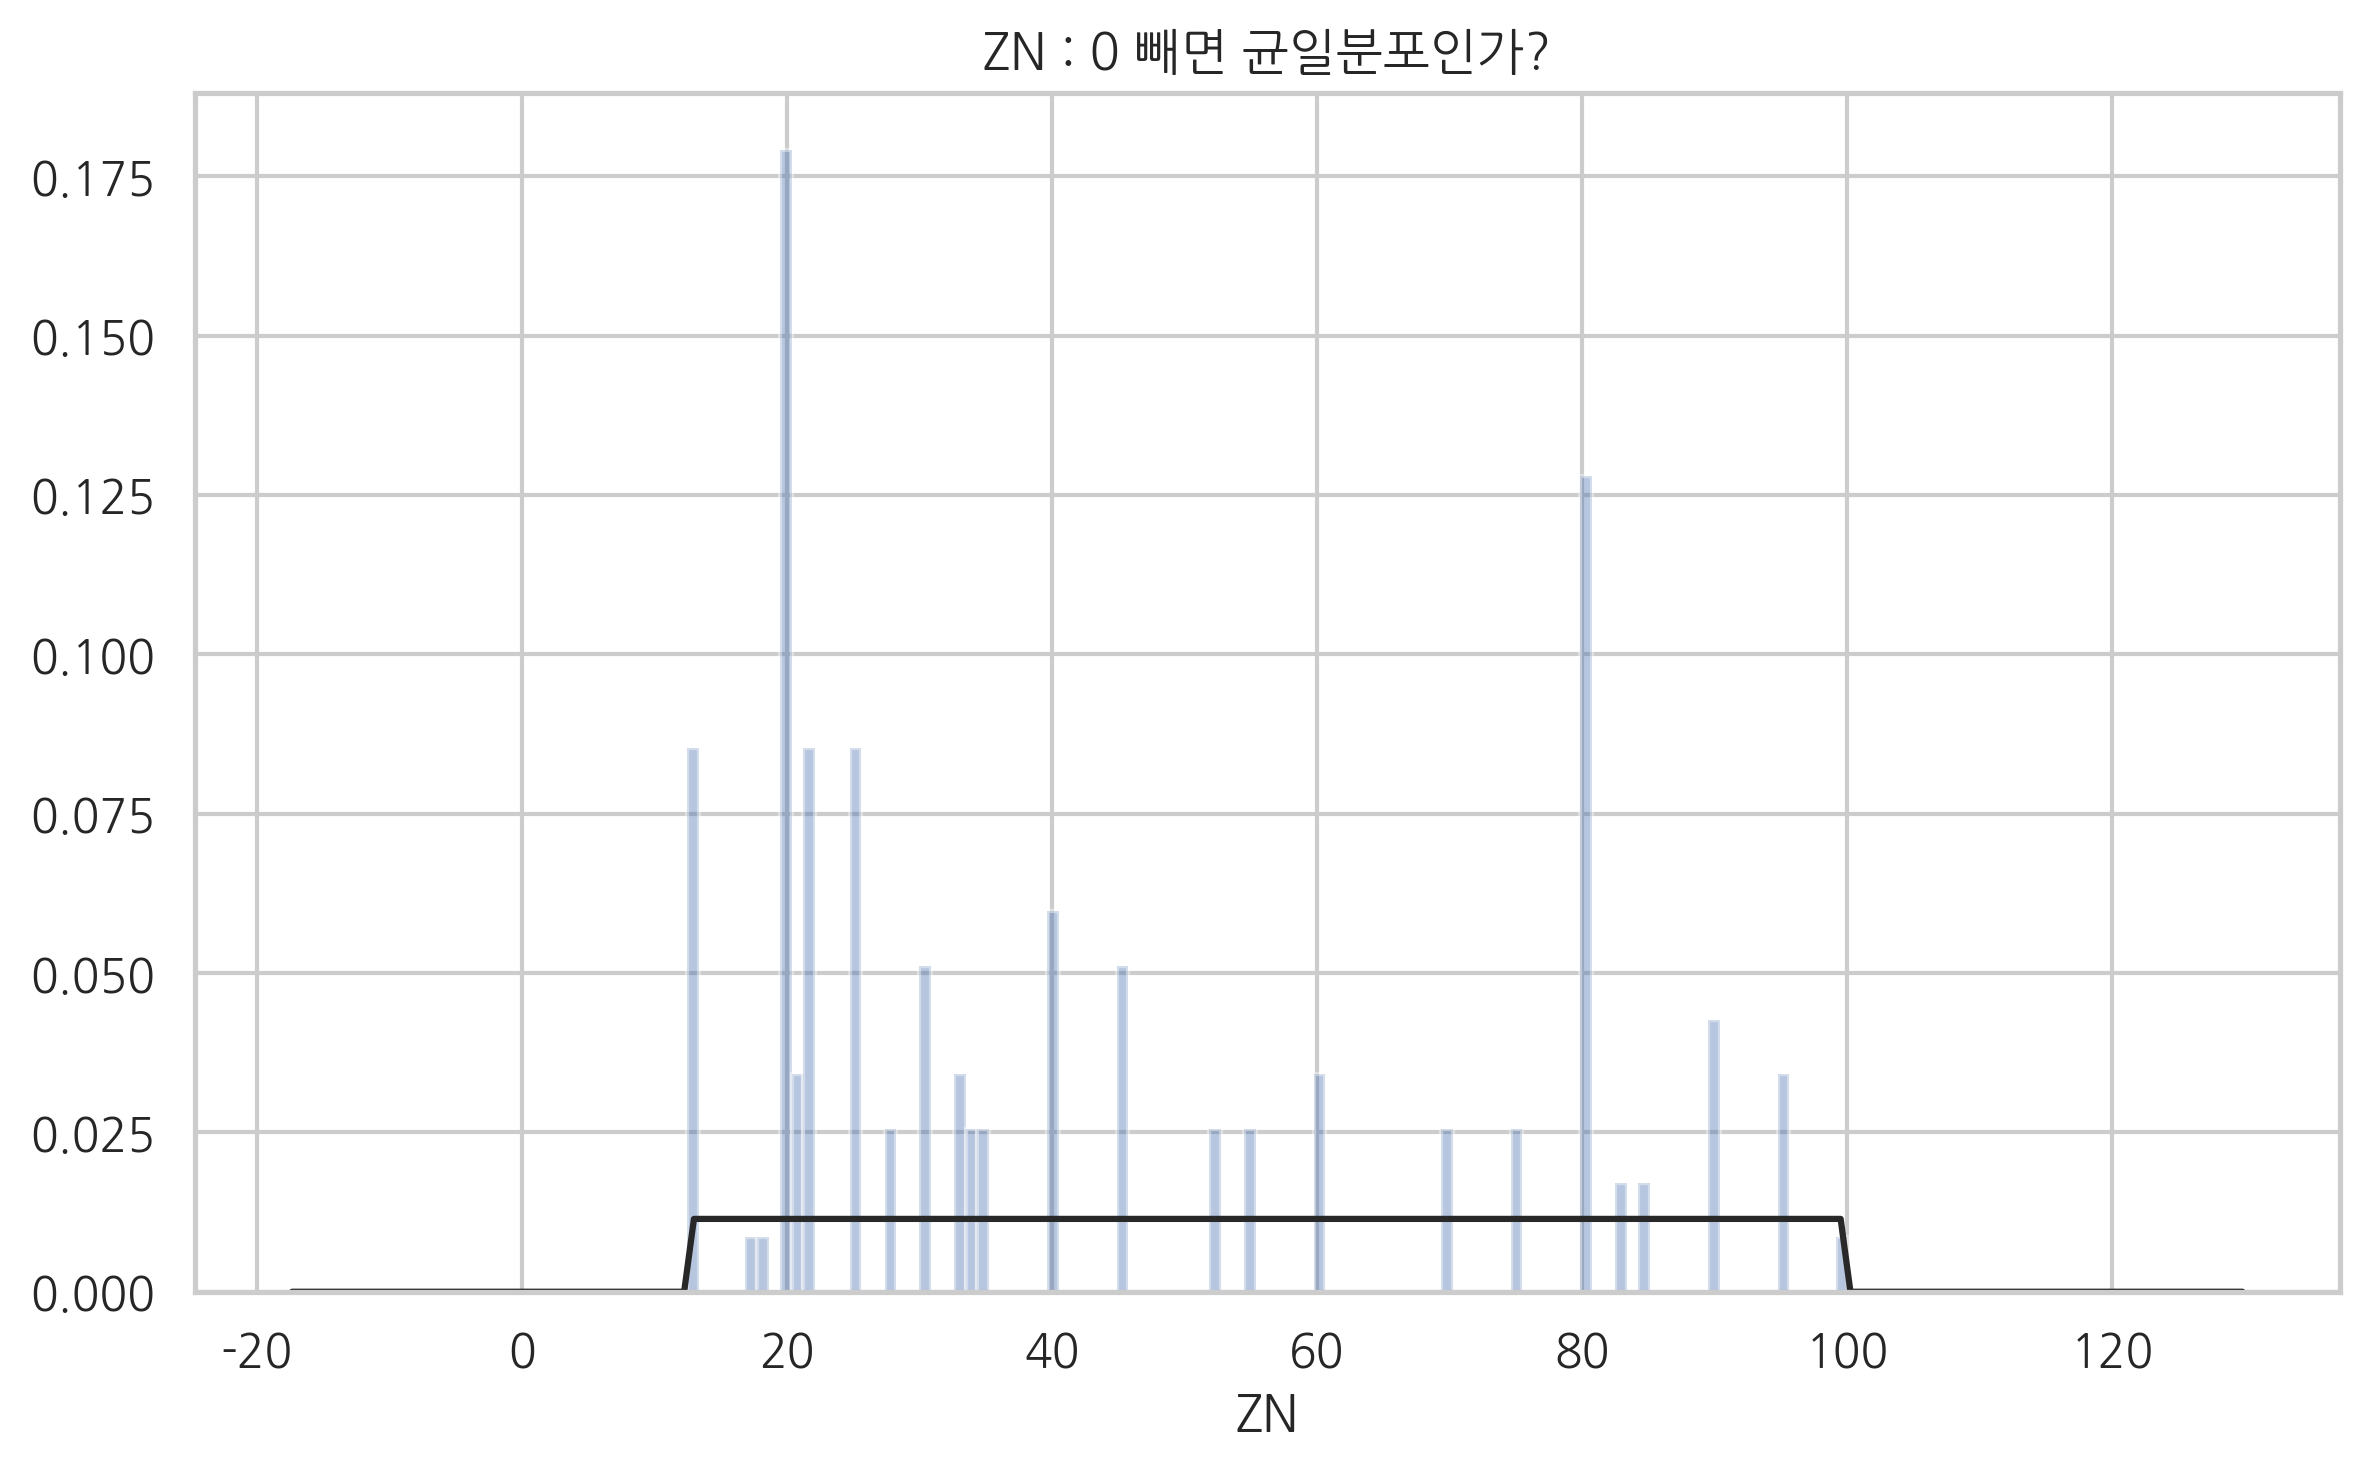

In [392]:
sns.distplot(df[df['ZN']!=0]['ZN'], bins=100, kde=False, fit=sp.stats.uniform)
plt.title('ZN : 0 빼면 균일분포인가?')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, '양수 데이터만 발생하는 다봉분포다 : 판단하기엔 데이터가 부족해 보인다')

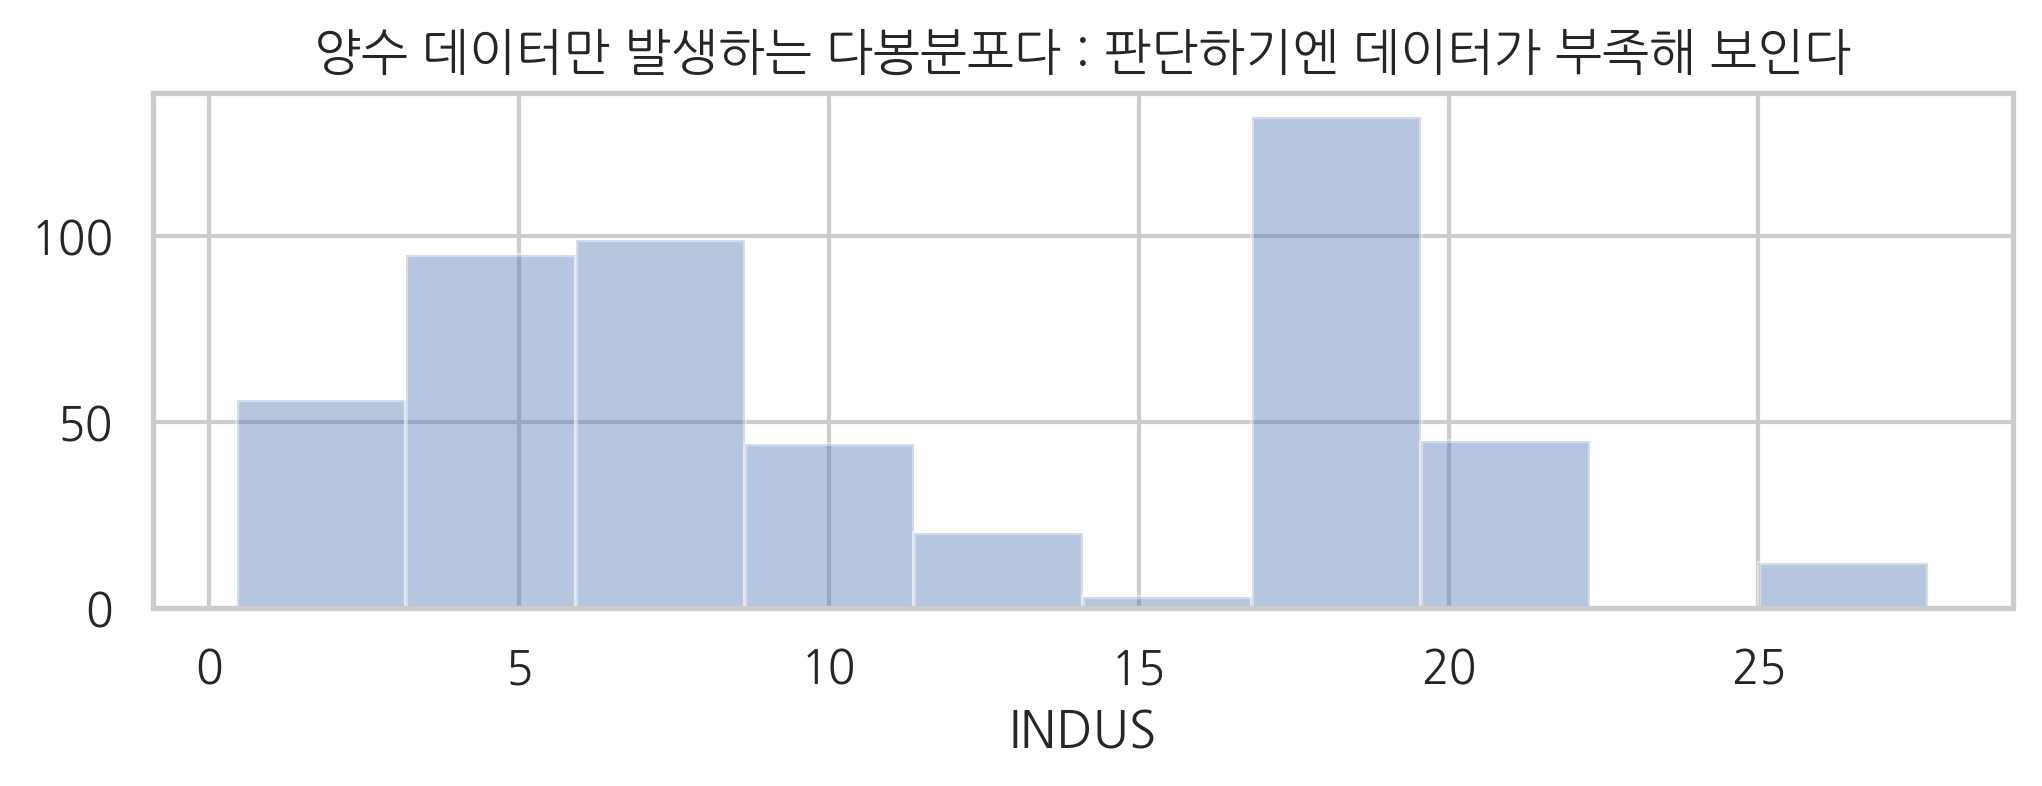

In [57]:
plt.subplot(211)
sns.distplot(df['INDUS'], kde=False, bins=10)
plt.title('양수 데이터만 발생하는 다봉분포다 : 판단하기엔 데이터가 부족해 보인다')

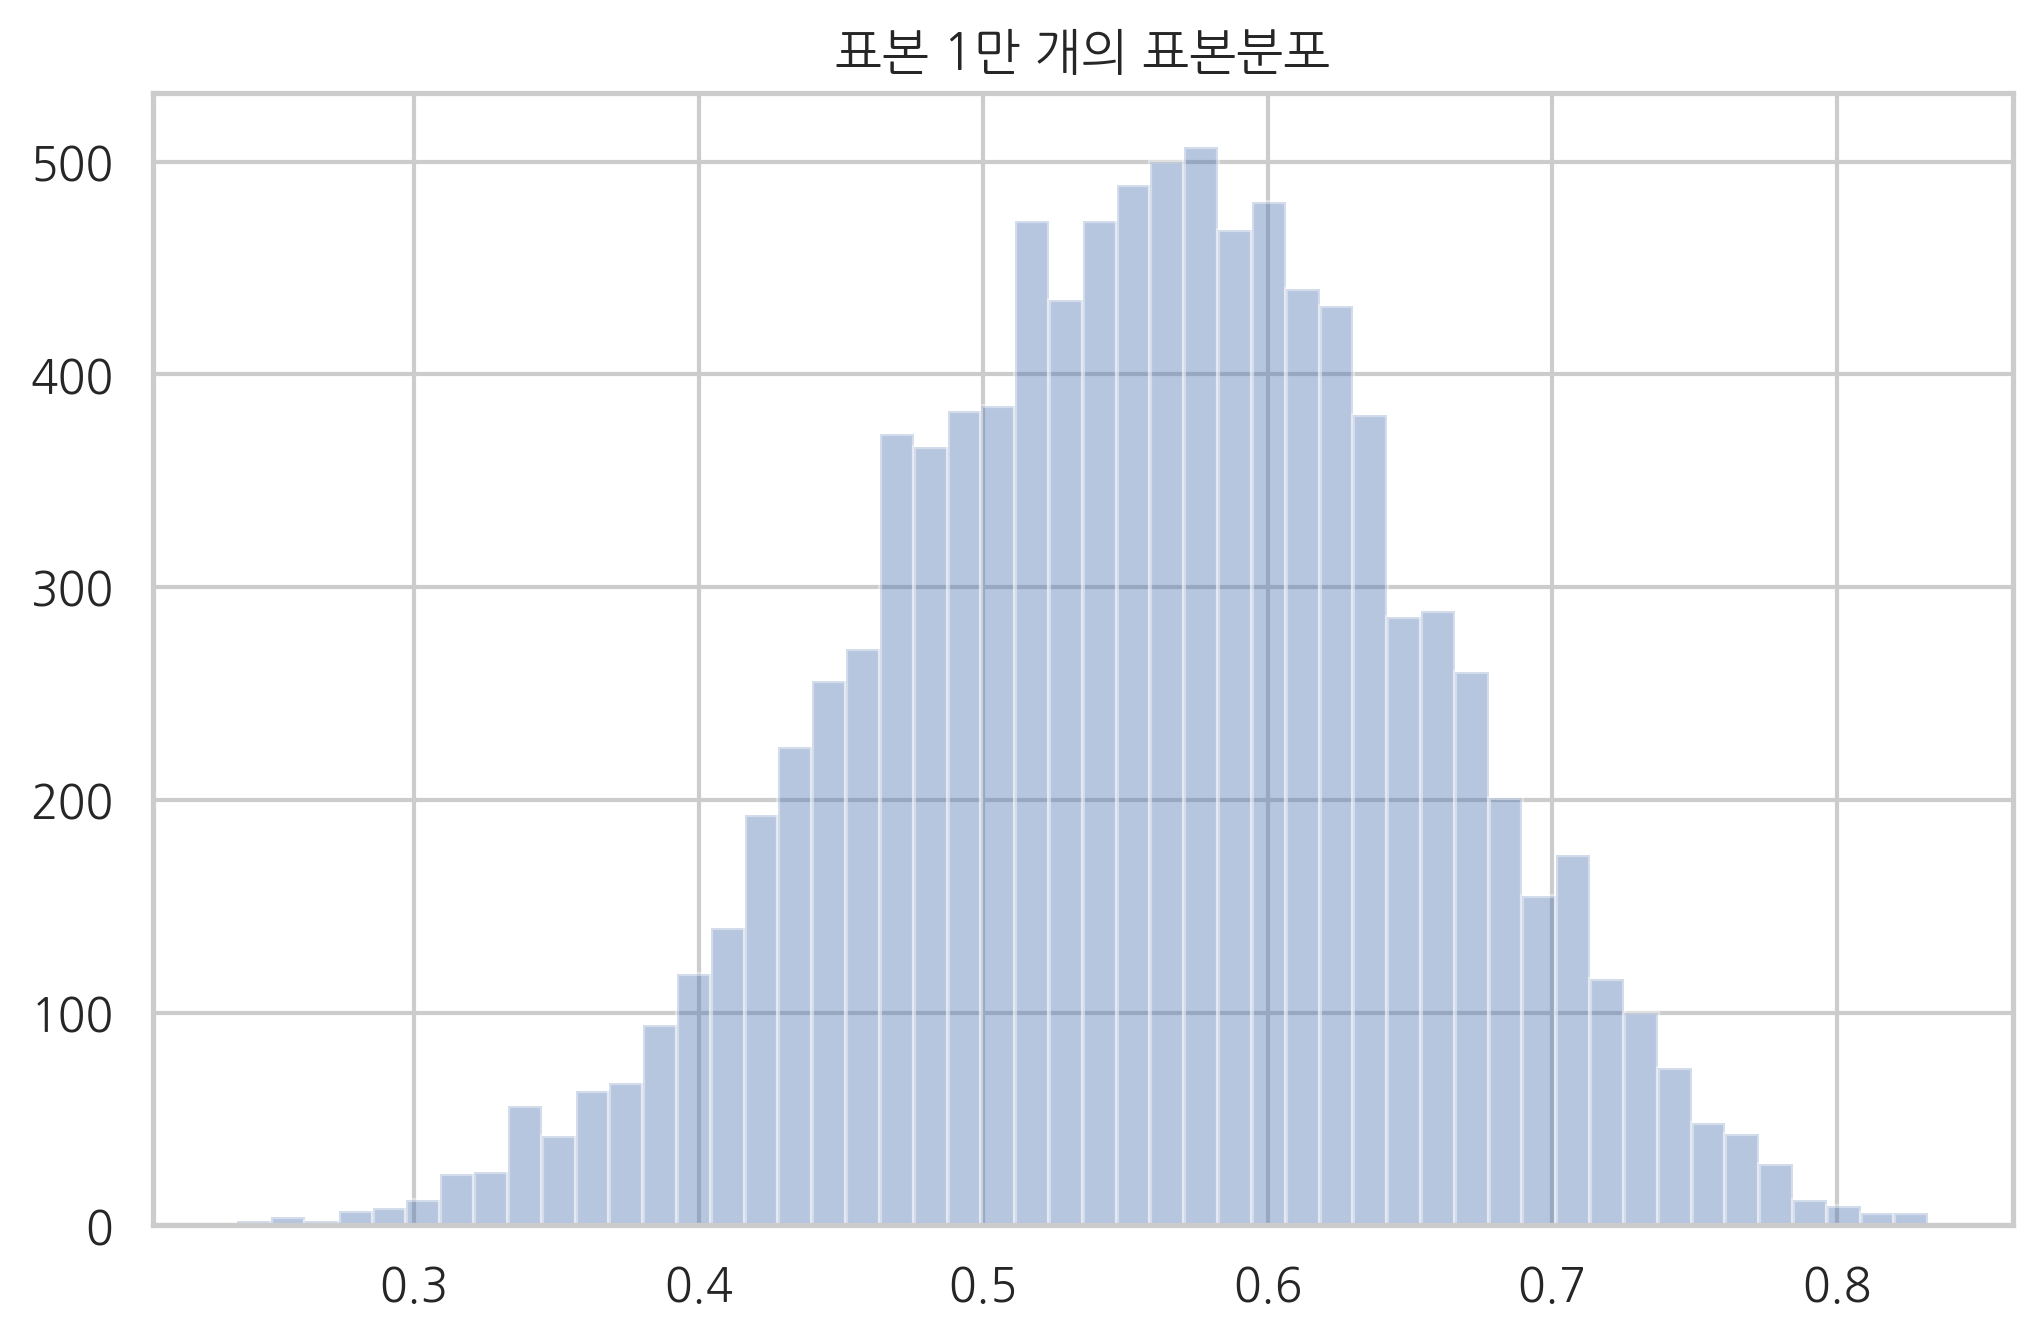

In [328]:
x = sp.stats.beta(15,12).rvs(10000, random_state=0)

sns.distplot(x, kde=False,)
plt.title('표본 1만 개의 표본분포')
plt.show()

In [257]:
# 모멘트방법으로 위 표본분포의 모수 a,b를 구해보자. 
x_bar = np.mean(x)
x_var = np.var(x, ddof=1)

a = x_bar*((x_bar*(1-x_bar))/x_var-1)
b = (1-x_bar)*((x_bar*(1-x_bar))/x_var-1)
print(a,b)
print(f'원래 모수 : 15, 12')
print('모멘트 방법으로 원래 모수와 비슷한 값 구할 수 있다')

15.345091691520754 12.210888176558264
원래 모수 : 15, 12
모멘트 방법으로 원래 모수와 비슷한 값 구할 수 있다


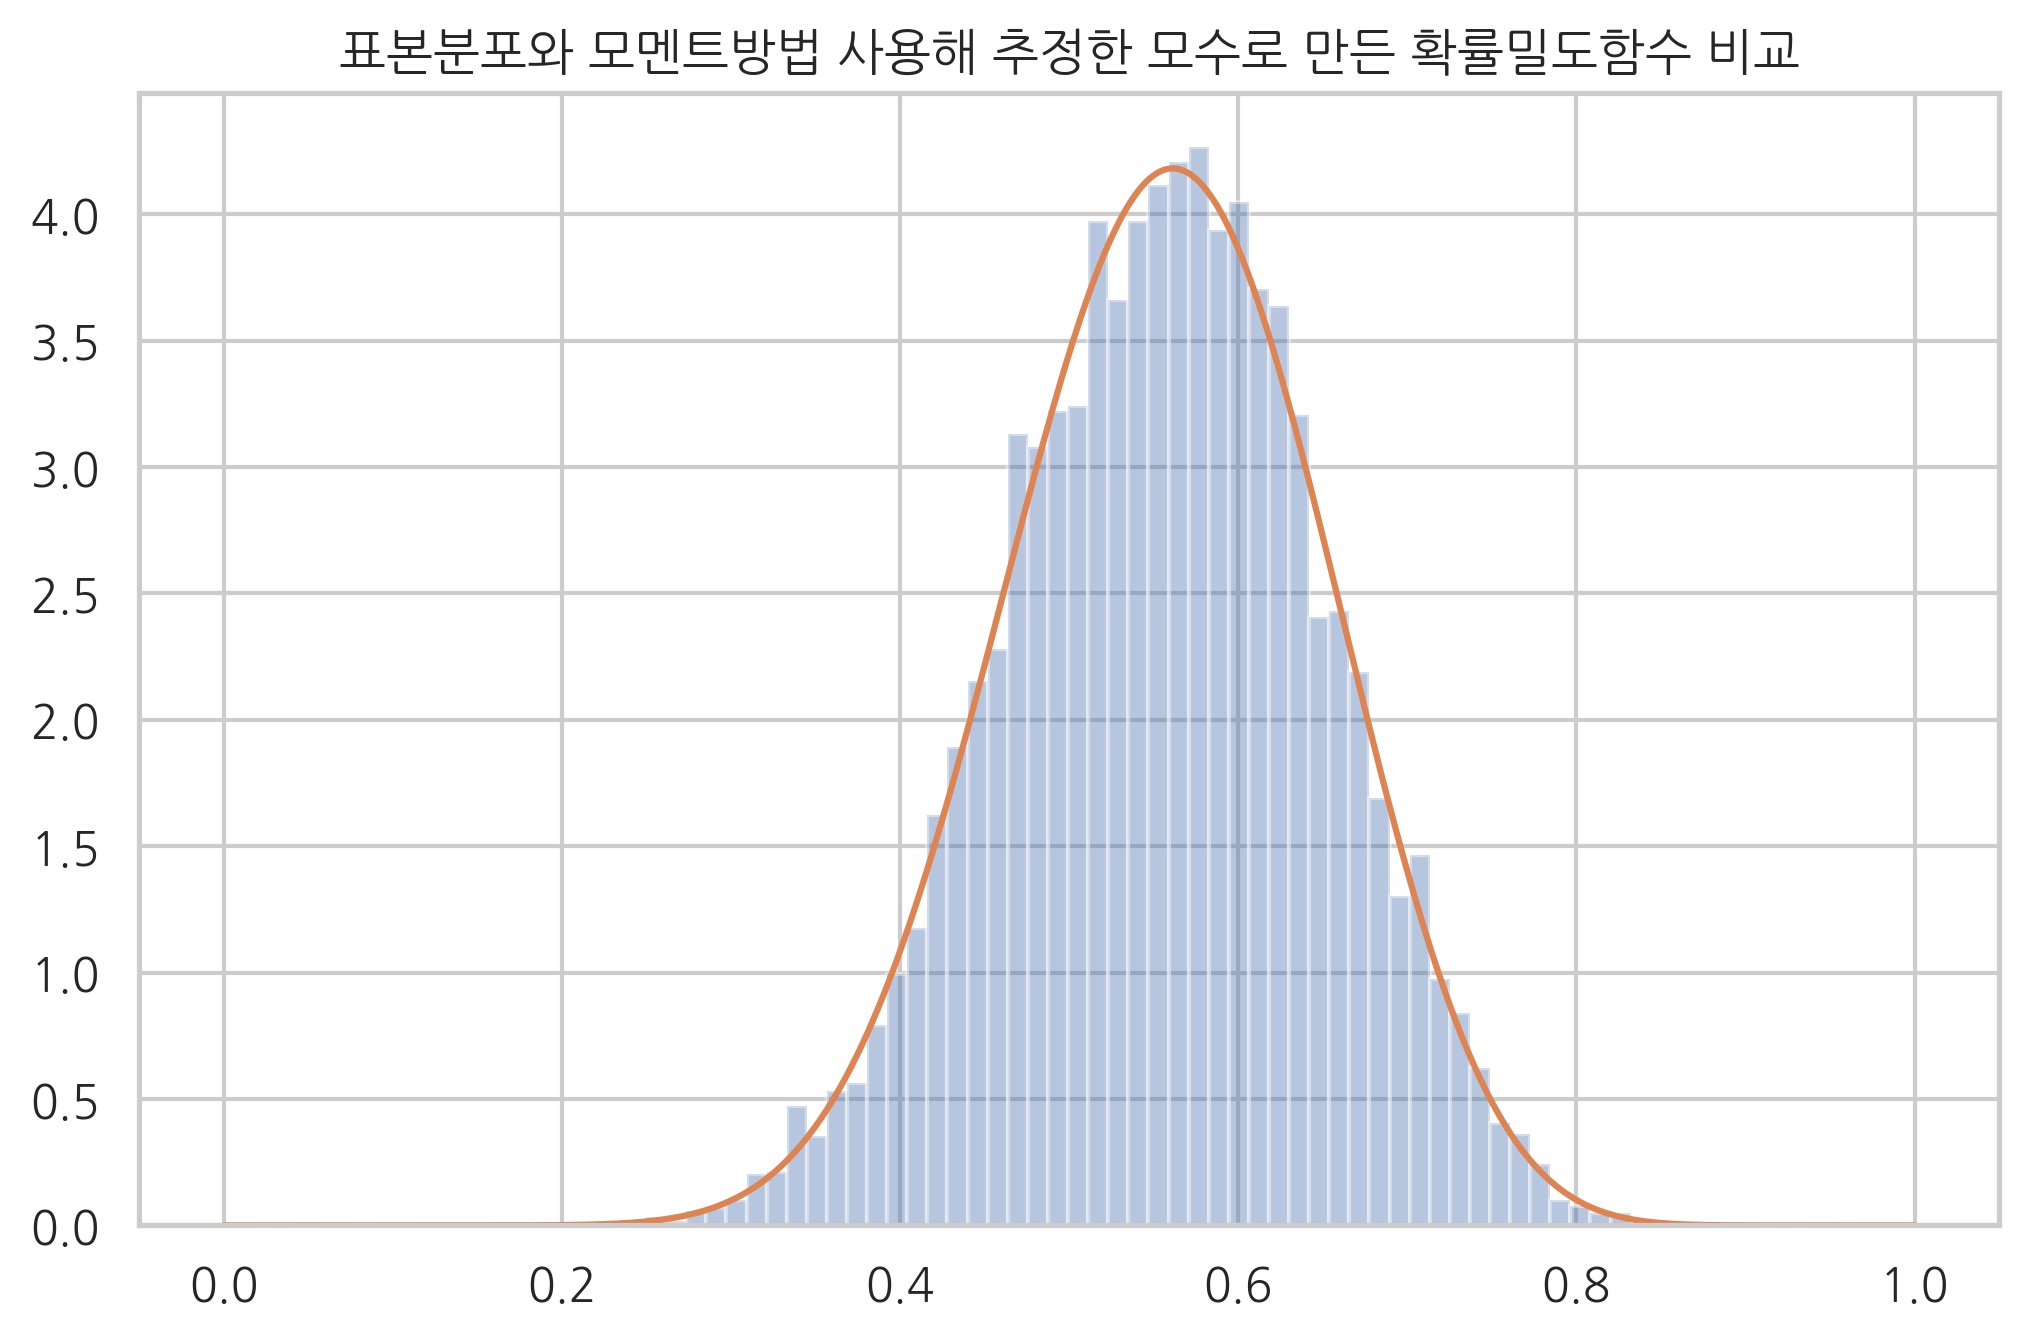

In [266]:
# 찾아낸 모수 이용해서 확률밀도함수와 표본분포 비교해보자. 
sns.distplot(x, kde=False, norm_hist=True)
xx = np.linspace(0,1,1000)
plt.plot(xx, sp.stats.beta(a, b).pdf(xx))
plt.title('표본분포와 모멘트방법 사용해 추정한 모수로 만든 확률밀도함수 비교')
plt.show()

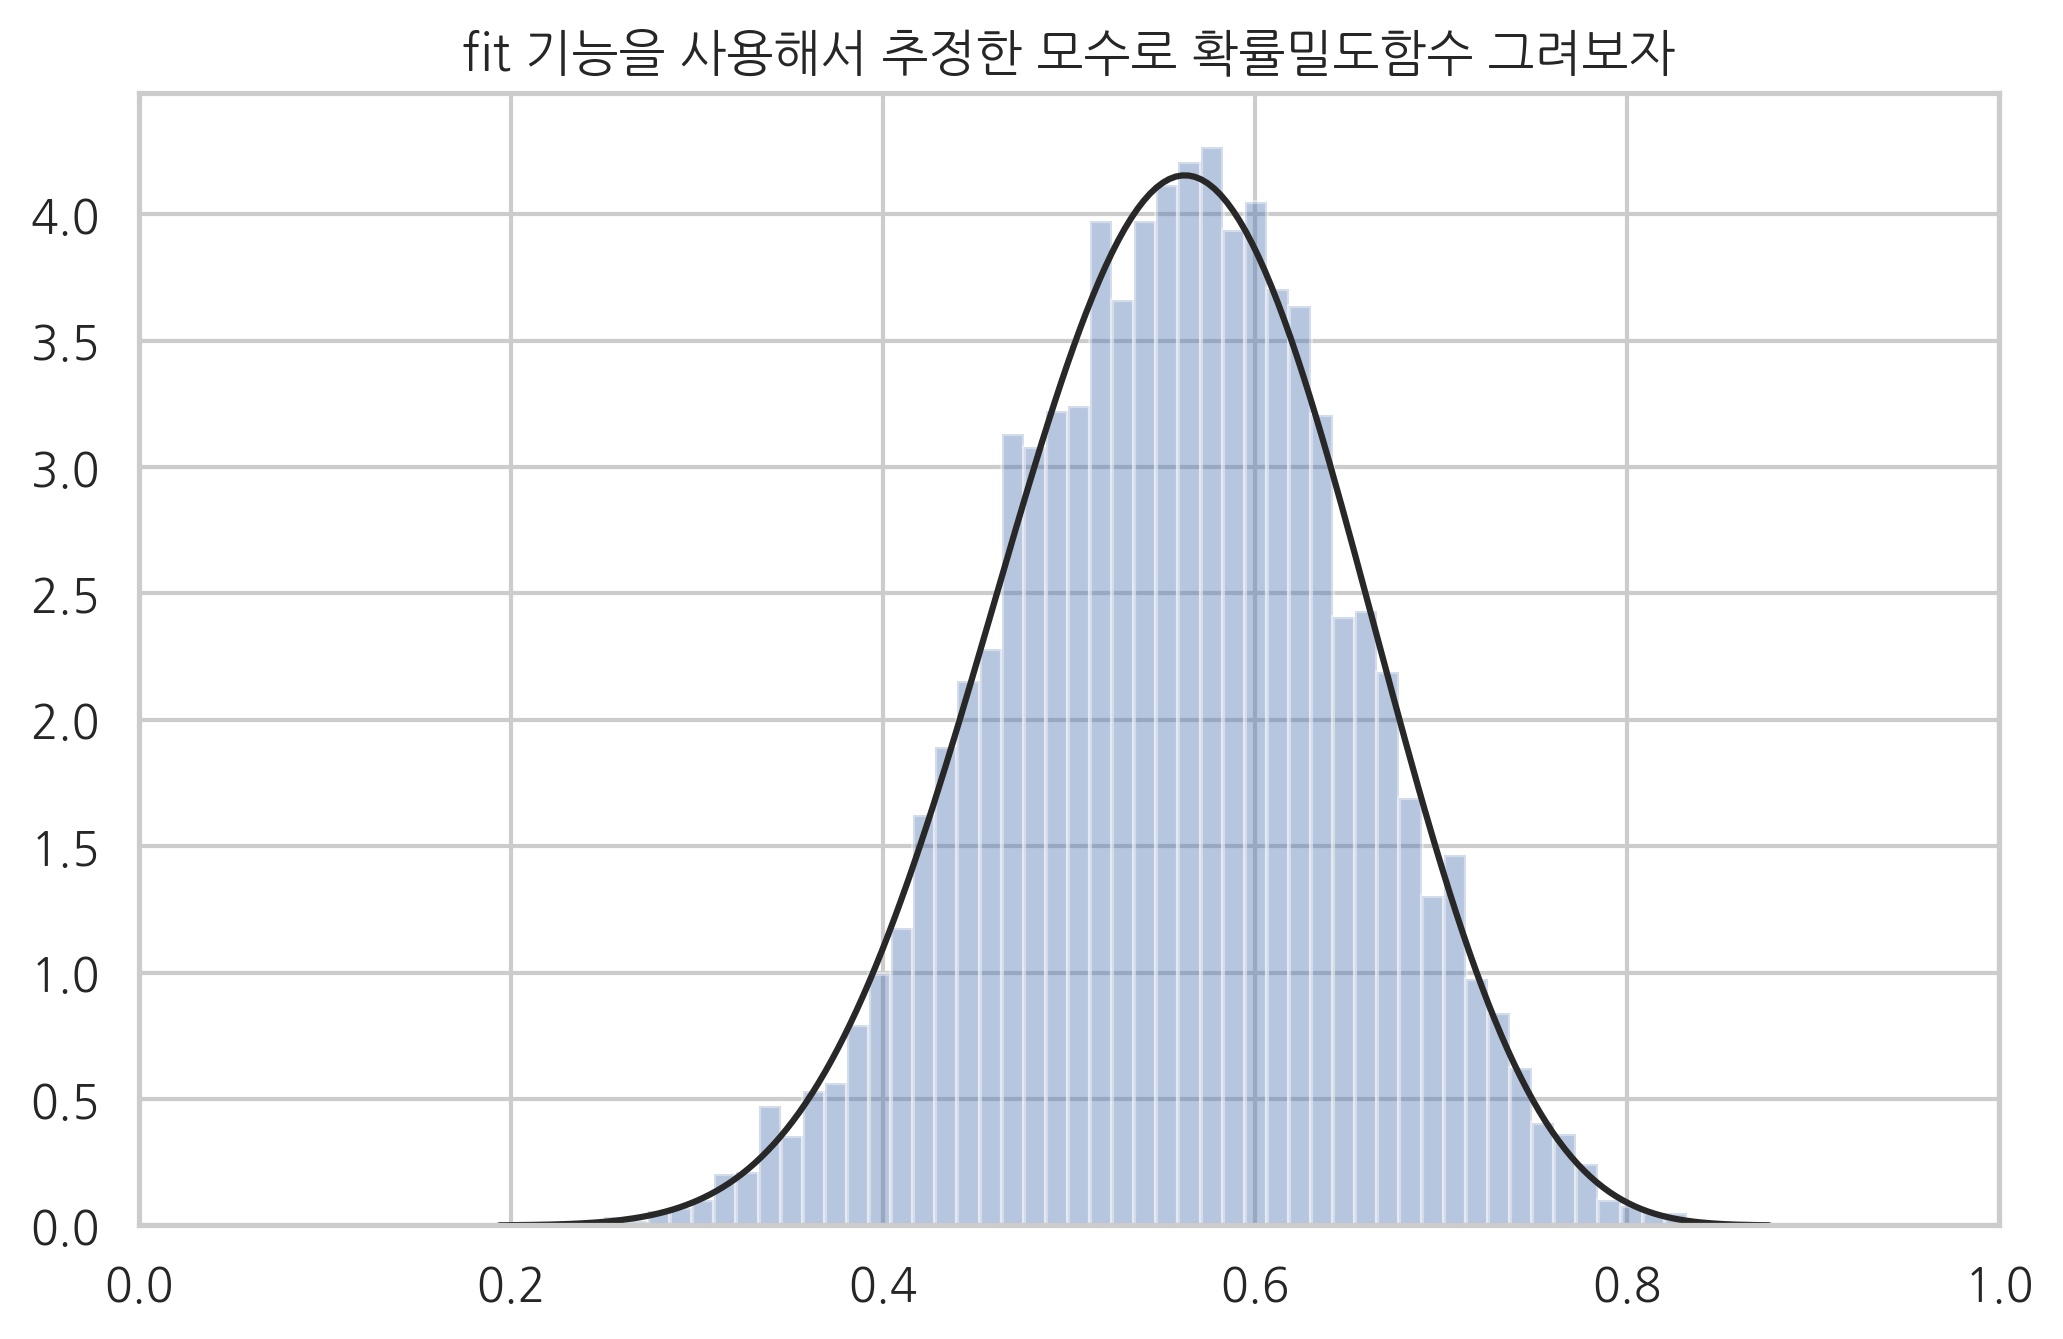

In [272]:
sns.distplot(x, kde=False, fit=sp.stats.beta)
plt.xlim(0,1)
plt.title('fit 기능을 사용해서 추정한 모수로 확률밀도함수 그려보자')
plt.show()


# 최대가능도 추정법 복습

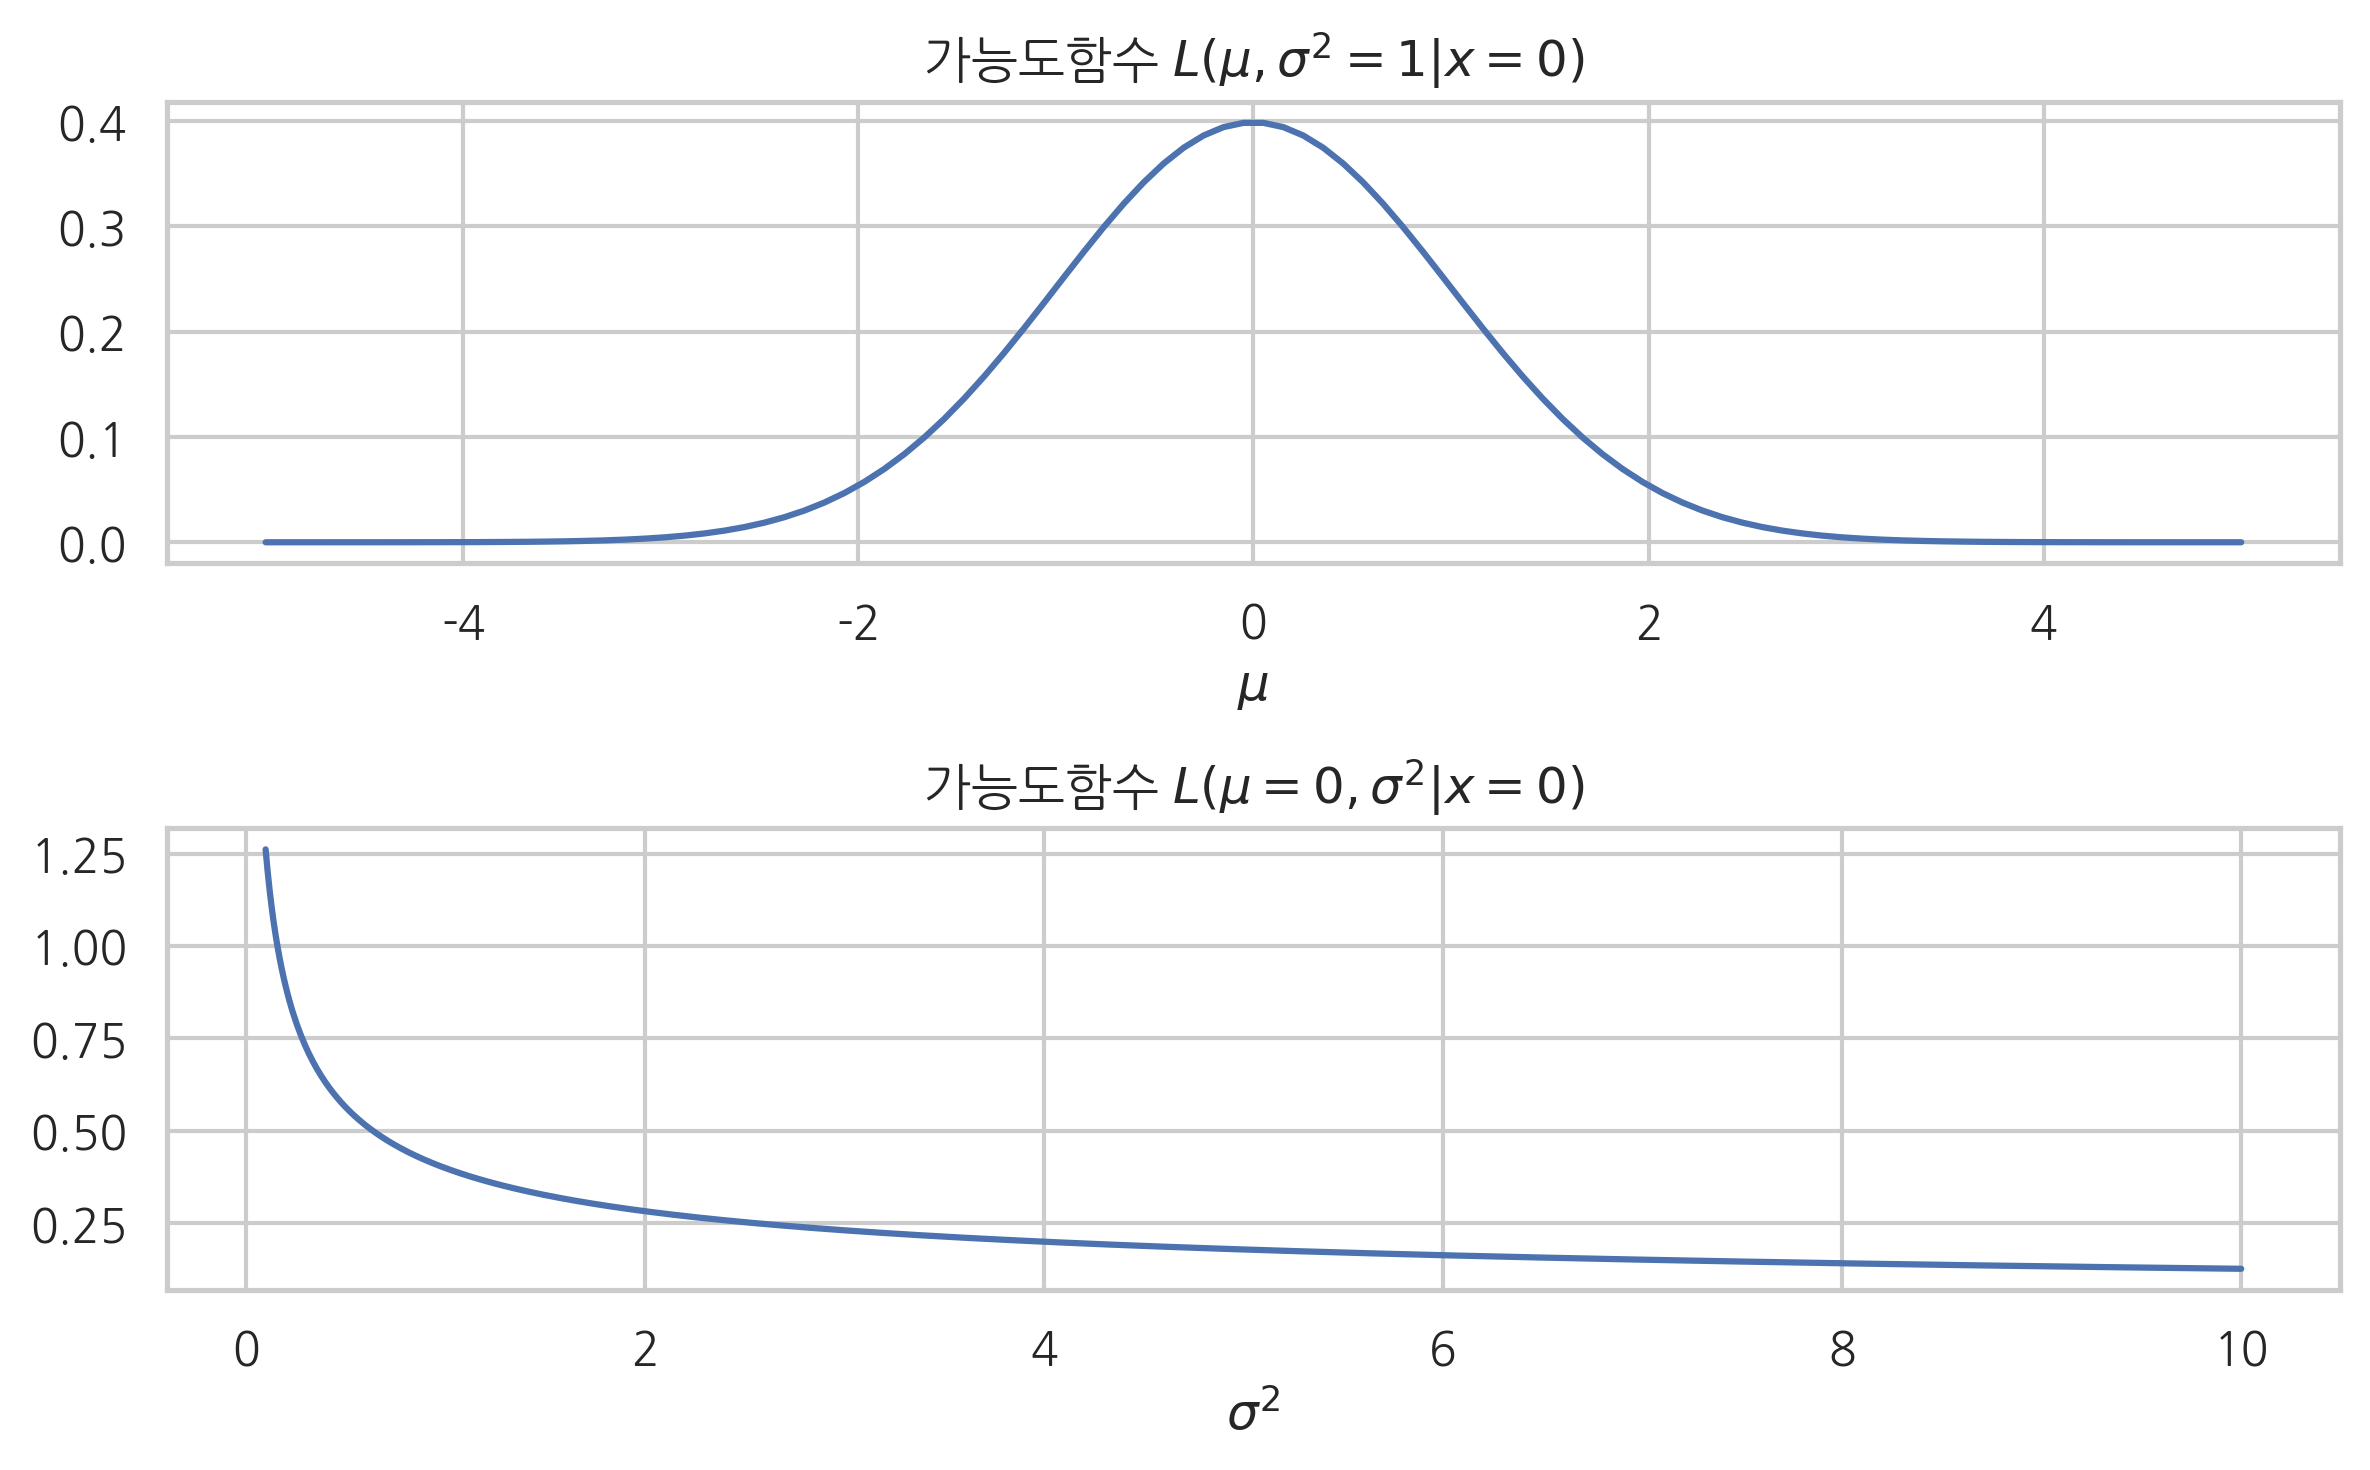

In [412]:
# 데이터=0, 정규분포 분산을 아는 경우 \sigma2 = 1
def likelihood(mu) : 
    return sp.stats.norm(loc=mu).pdf(0) # 가능도 값
mus = np.linspace(-5,5,100)
likelihood_values = [likelihood(mu) for mu in mus]
plt.subplot(211)
plt.plot(mus, likelihood_values)
plt.title('가능도함수 $L(\mu, \sigma^{2} = 1 | x=0)$')
plt.xlabel('$\mu$')

# 데이터=0, 정규분포 기댓값을 아는 경우 \mu = 0
def likelihood2(sigma2) : 
    return sp.stats.norm(scale=np.sqrt(sigma2)).pdf(0)

sigma2s = np.linspace(0.1, 10,1000)
likelihood_values = [likelihood2(sigma2) for sigma2 in sigma2s]
plt.subplot(212)
plt.plot(sigma2s, likelihood_values)
plt.title('가능도함수 $L(\mu=0, \sigma^{2}|x=0)$')
plt.xlabel('$\sigma^{2}$')

plt.tight_layout()
plt.show()

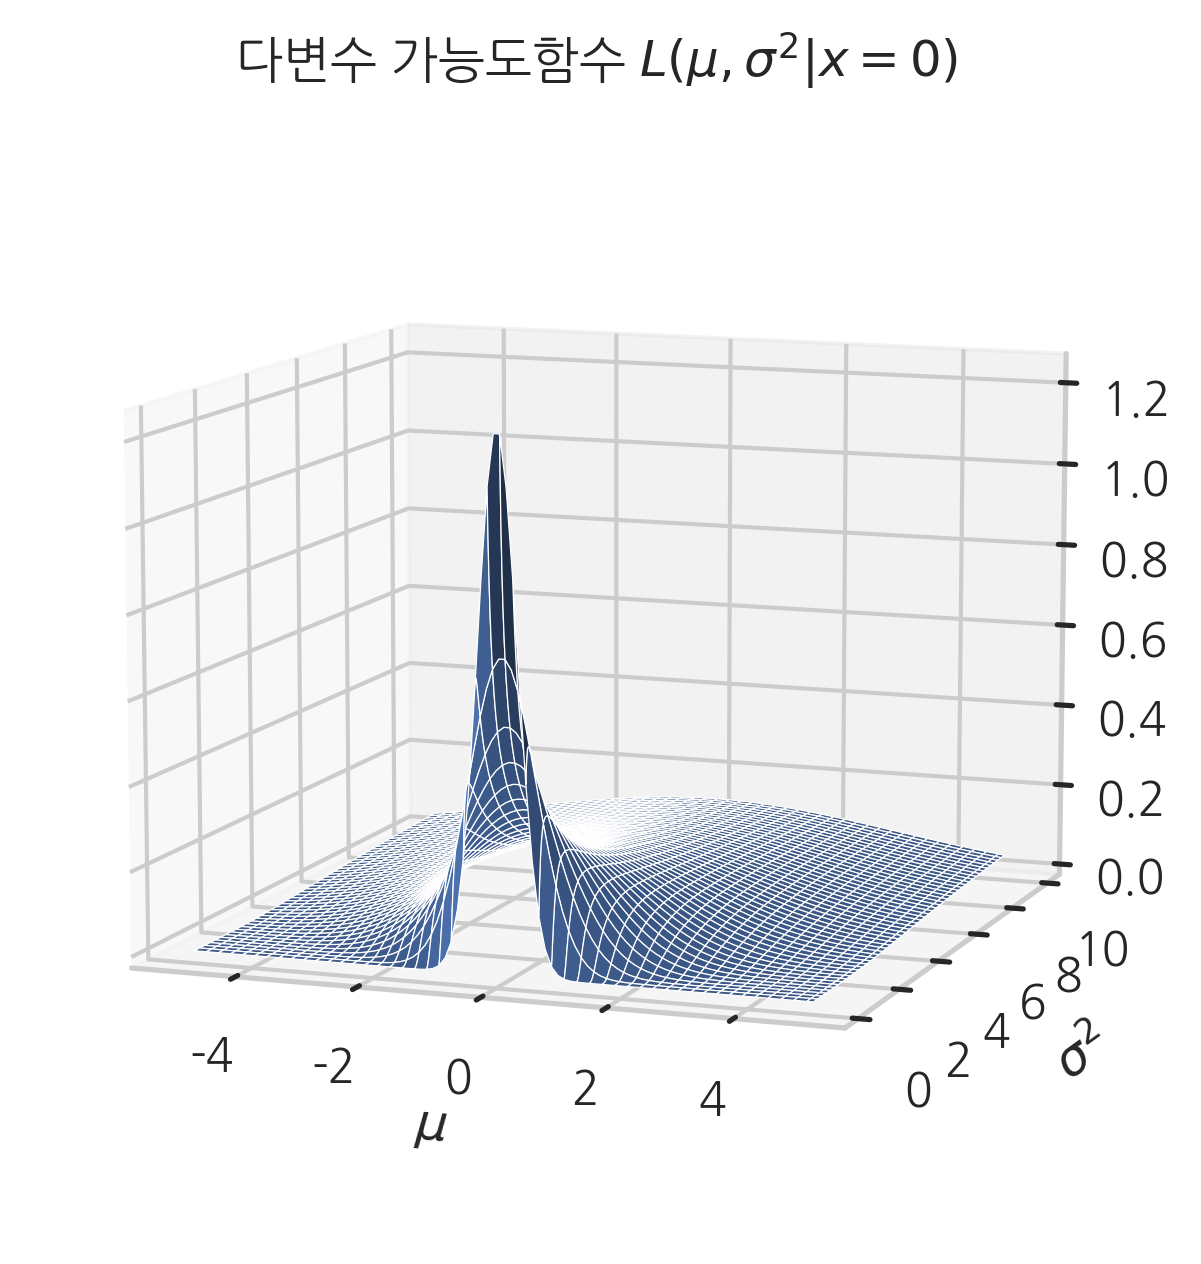

In [446]:
MU, SIGMA2 = np.meshgrid(mus, sigma2s)
L = np.exp(-MU**2/(2*SIGMA2))/np.sqrt(2*np.pi*SIGMA2)

fig = plt.figure()
ax = fig.gca(projection='3d')
plt.title('다변수 가능도함수 $L(\mu, \sigma^{2}|x=0)$')
ax.plot_surface(MU, SIGMA2, L, linewidth=0.3)
plt.xlabel('$\mu$')
plt.ylabel('$\sigma^{2}$')
ax.view_init(10,-70)
plt.show()

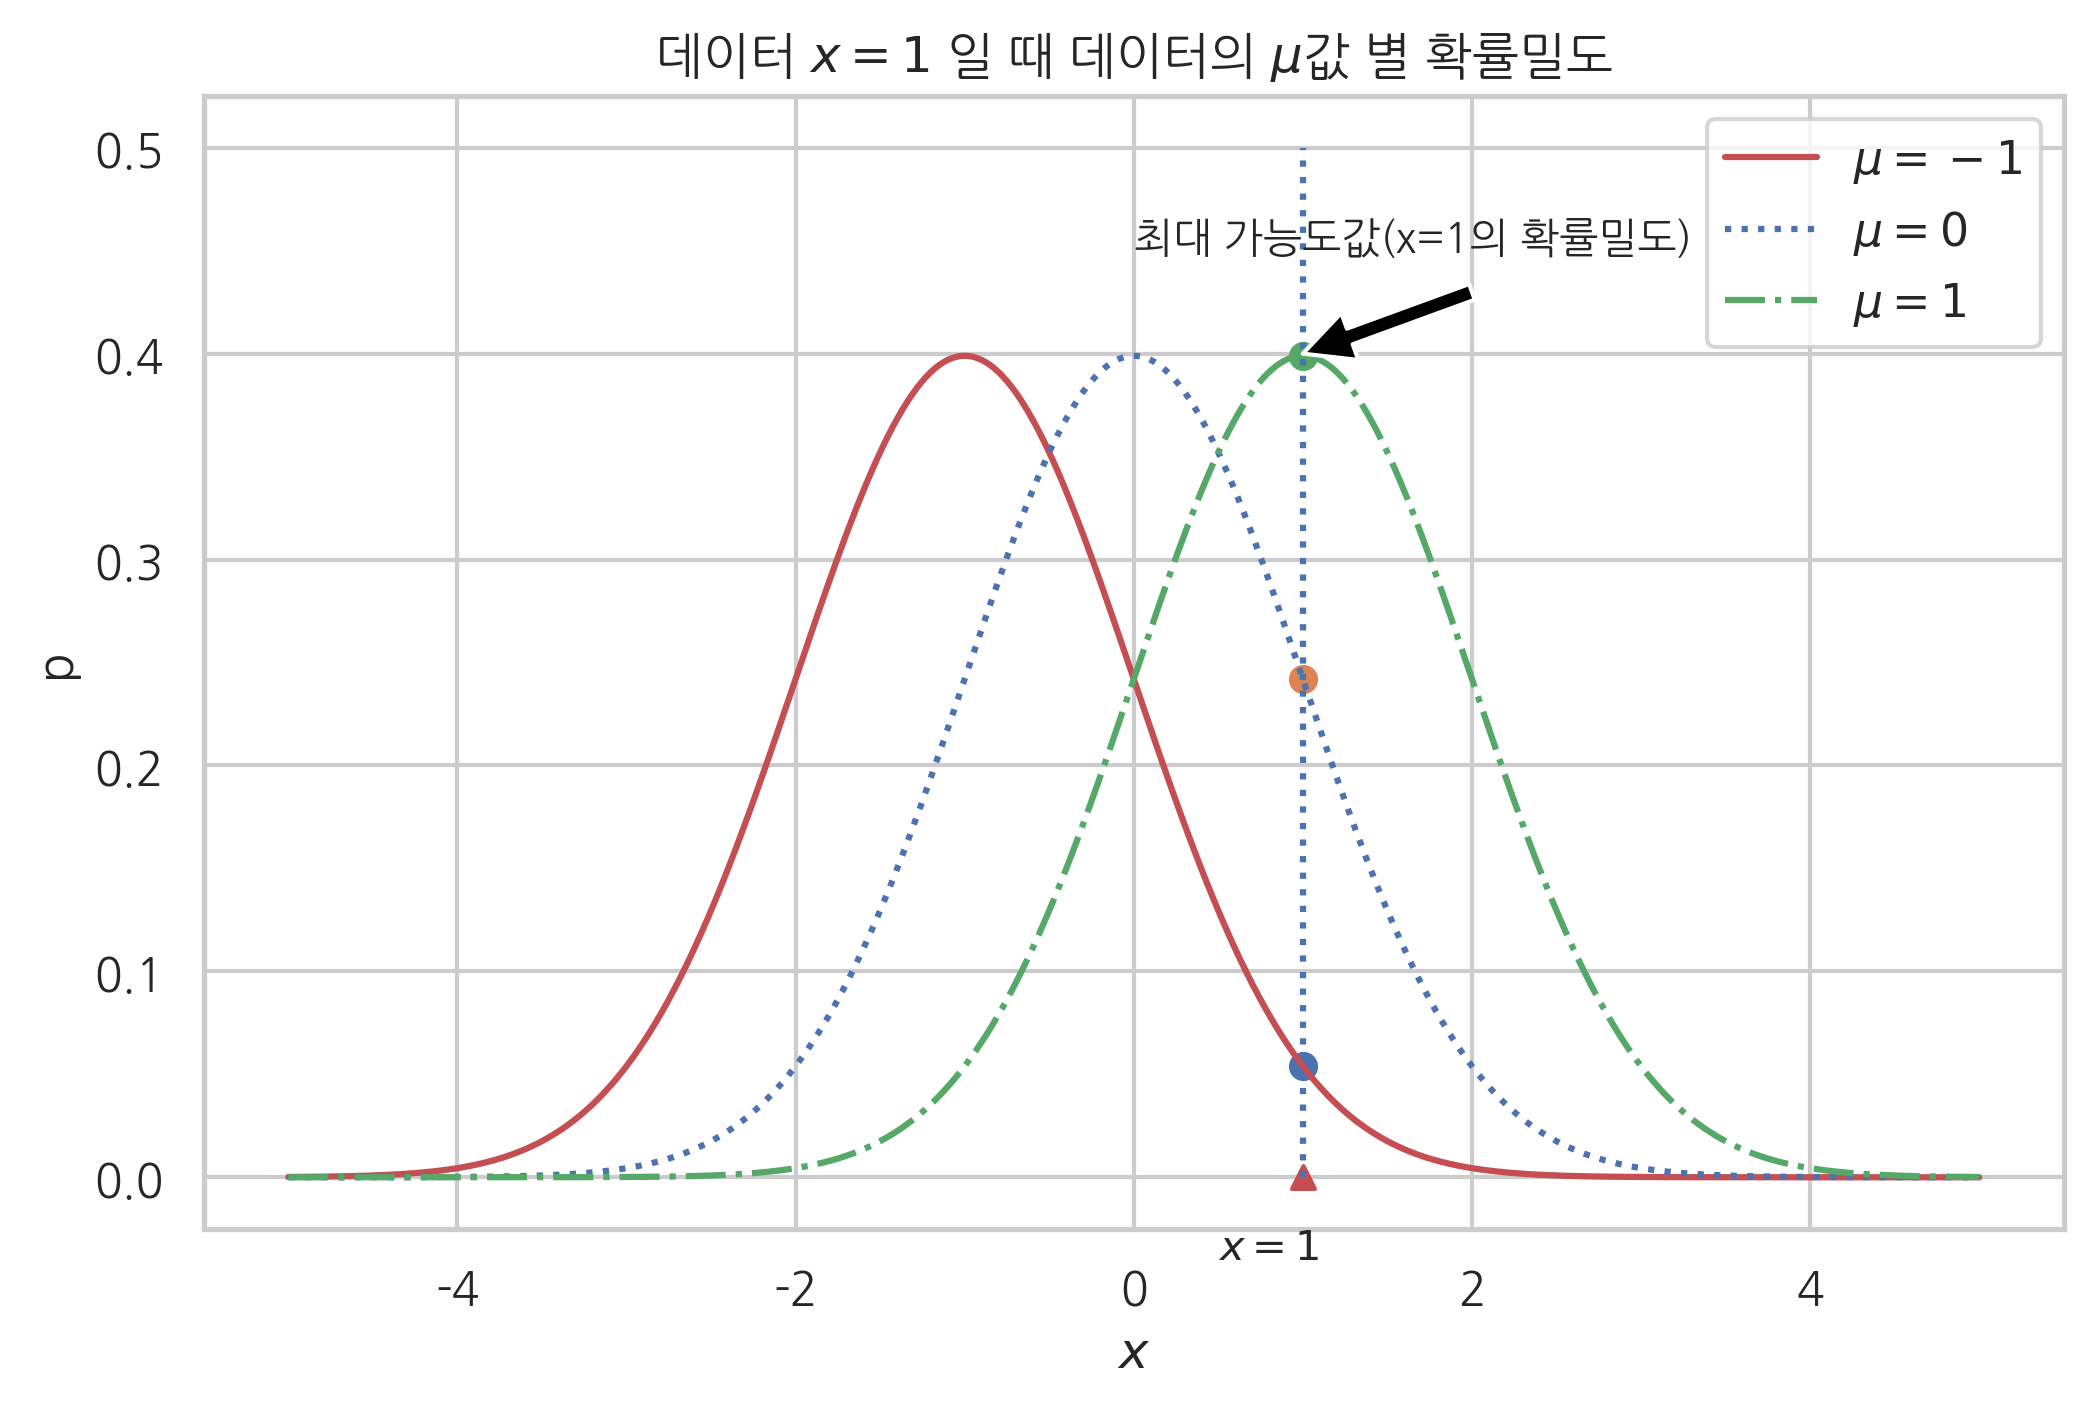

In [484]:
# 최대가능도추정법 원리 
L = [sp.stats.norm(loc=mu).pdf(1) for mu in [-1,0,1]]
plt.scatter(1, L[0])
plt.scatter(1, L[1])
plt.scatter(1, L[2])
plt.vlines(1.00, ymin=0, ymax=0.5, ls=':')
plt.title('데이터 $x=1$ 일 때 데이터의 $\mu$값 별 확률밀도')

black = {'facecolor' : 'black'}
xx = np.linspace(-5,5,1000)
plt.plot(xx, sp.stats.norm(loc=-1, scale=1).pdf(xx), c='r', label='$\mu=-1$')
plt.plot(xx, sp.stats.norm(loc=0, scale=1).pdf(xx), c='b', ls=':' , label='$\mu=0$')
plt.plot(xx, sp.stats.norm(loc=1, scale=1).pdf(xx), c='g', ls='-.', label='$\mu=1$')
plt.text(0, 0.45, '최대 가능도값(x=1의 확률밀도)')
plt.annotate('', xy=[1, 0.4], xytext=[2,0.43], arrowprops=black)
plt.xlabel('$x$')
plt.ylabel('p')
plt.text(0.5, -0.04, '$x=1$')
plt.scatter(1,0,30, marker='^')
plt.legend()
plt.show()

Text(0.5, 1.0, '정규분포를 이용해 계산한 가능도함수 형태는 이런 형태일 것이다.')

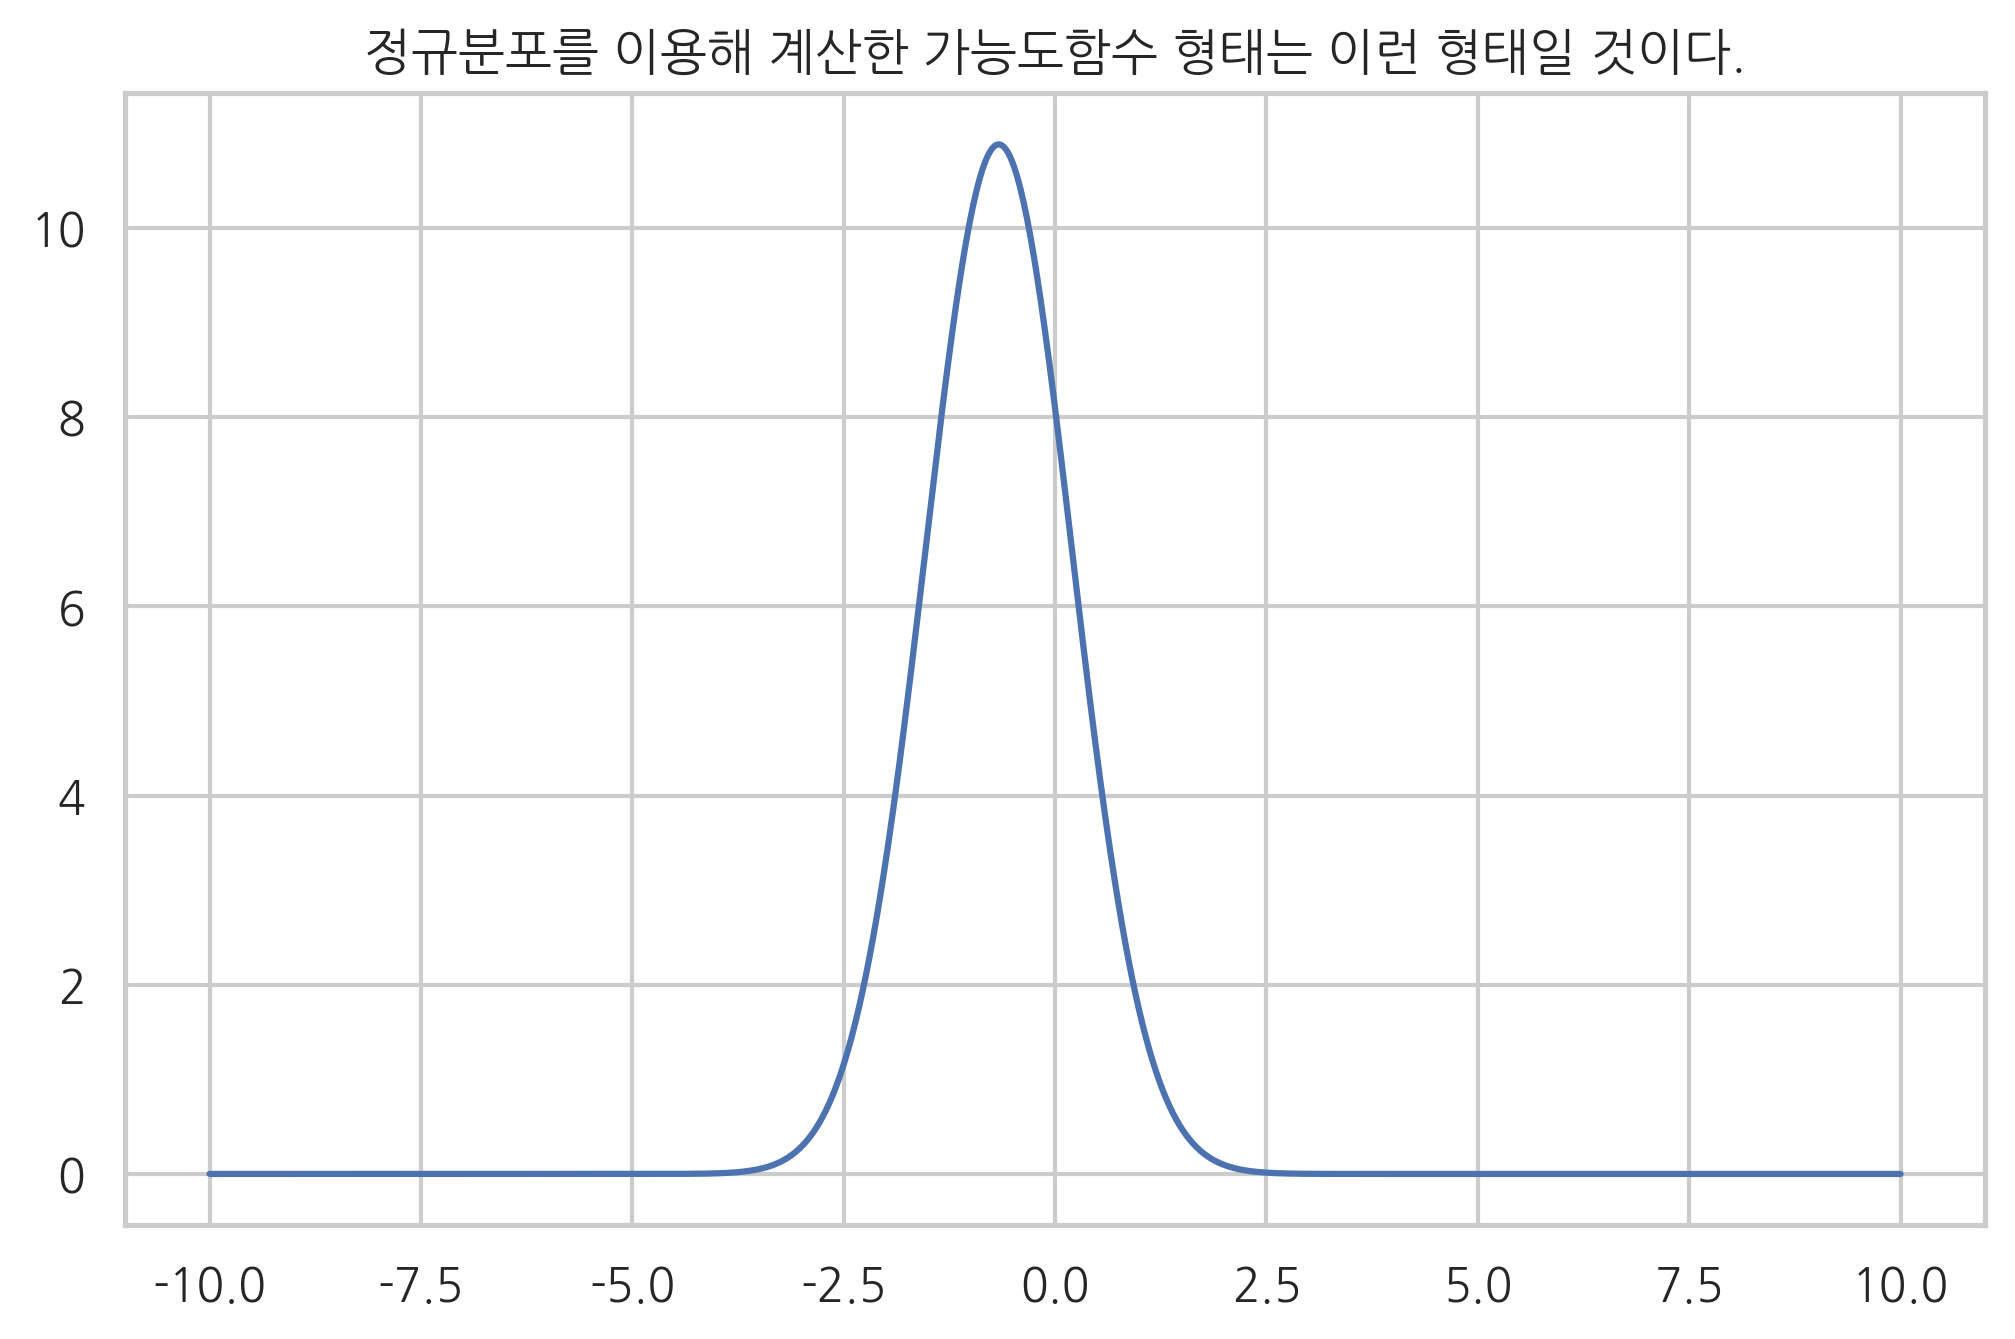

In [511]:
# 실험
xx = np.linspace(-10,10,1000)

def function(xx) : 
    return -2/3*(xx+2/3)**2+13/3
a = function(xx)
result = np.exp(a)
final_result = 1/7*result
plt.plot(xx, final_result)

plt.title('정규분포를 이용해 계산한 가능도함수 형태는 이런 형태일 것이다.')

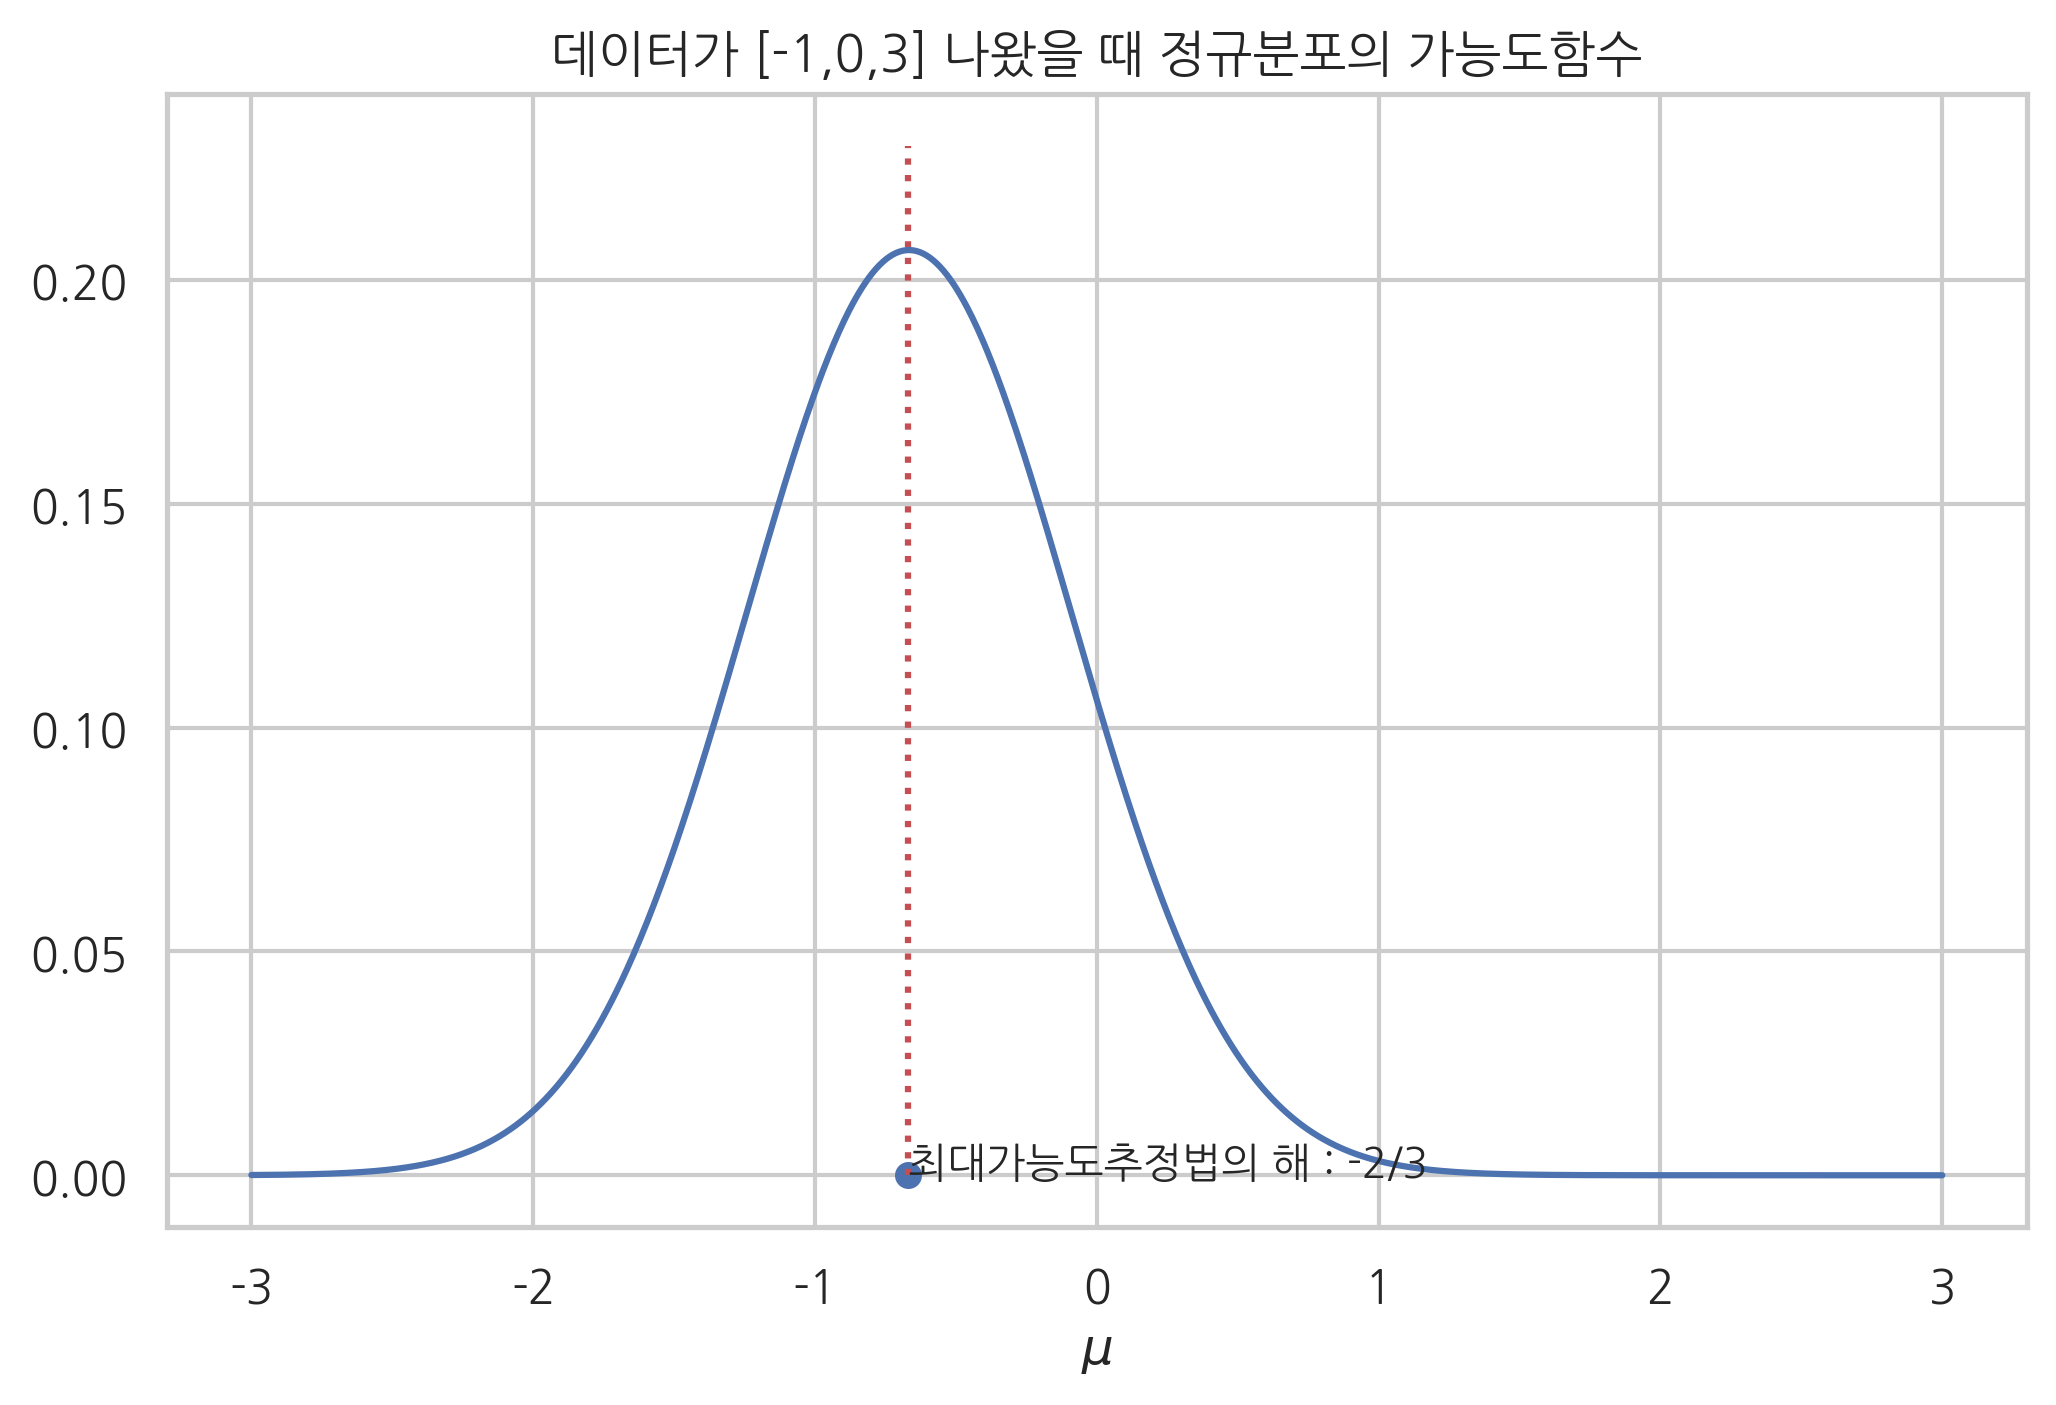

In [539]:
# 실제 
mu = np.linspace(-3,3,1000)
sigma2 = 1

def likelihood(mu) : 
    return (2*np.pi*sigma2)**(3/2)*np.exp(-(3*mu**2+4*mu+10)/(2*sigma2))
li = likelihood(mu)

plt.plot(mu, li)
plt.title('데이터가 [-1,0,3] 나왔을 때 정규분포의 가능도함수')
plt.xlabel('$\mu$')
plt.vlines(mu[list(li).index(np.max(li))], ymin=0.0, ymax=0.23, ls=':', color='r')
plt.scatter(mu[list(li).index(np.max(li))],0,30)
plt.text(mu[list(li).index(np.max(li))],0.0001, '최대가능도추정법의 해 : -2/3')
plt.show()